In [1]:
# Read all lines from the file
import pandas as pd
import matplotlib.pyplot as plt

def define_table(path, has_params: bool = False):
    with open(path, 'r') as f:
        params = None
        if has_params: params = [param.strip() for param in f.readline().split(",")]
        lines = f.readlines()
    # Remove whitespace characters like `\n` at the end of each line
        lines = [x.strip()[1:-1] for x in lines]
    # Transform lines into a list of tuples
        lines = [tuple(x.split(",")) for x in lines]
    # Transform list of tuples into a dictionary
        df = pd.DataFrame(lines, columns=['i', 'j', 'temperature', 'score'])
        df['temperature'] = df['temperature'].astype(float)
        df['score'] = df['score'].astype(int)
        df['i'] = df['i'].astype(int)
        df['j'] = df['j'].astype(int)
        table = df
    return table,params


['100', '50', '20', '0.5', '238']


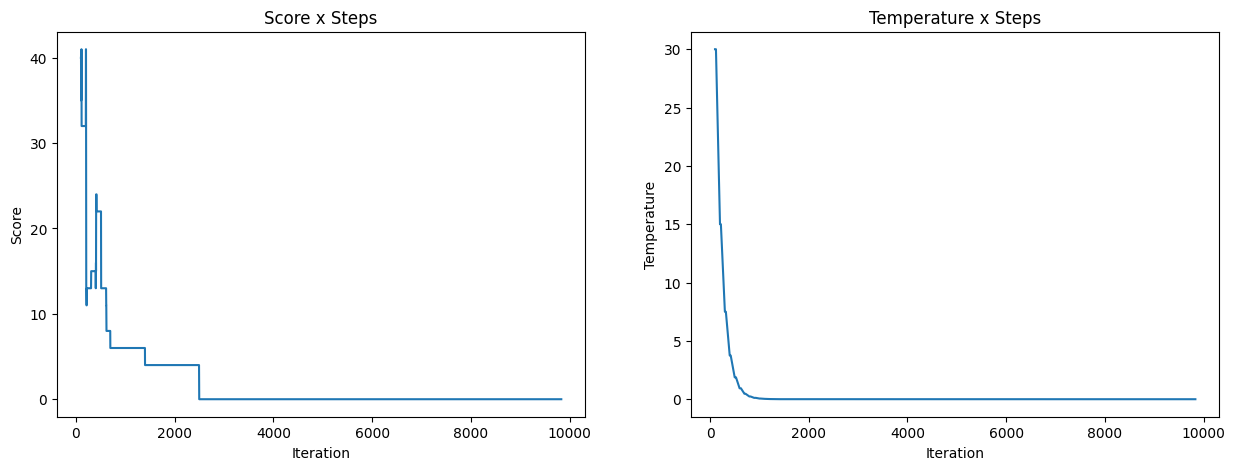

['100', '50', '20', '0.7', '238']


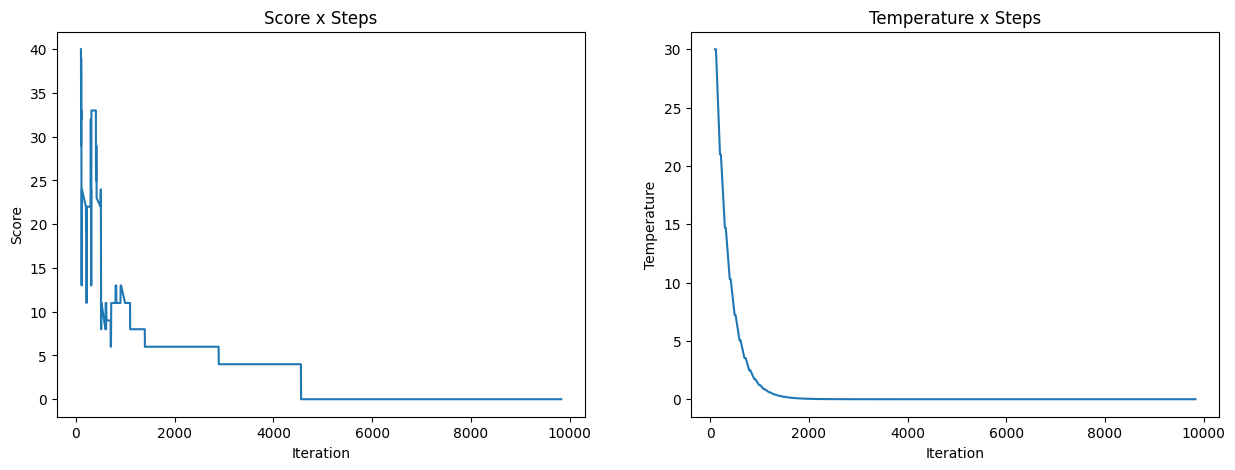

['100', '50', '20', '0.9', '238']


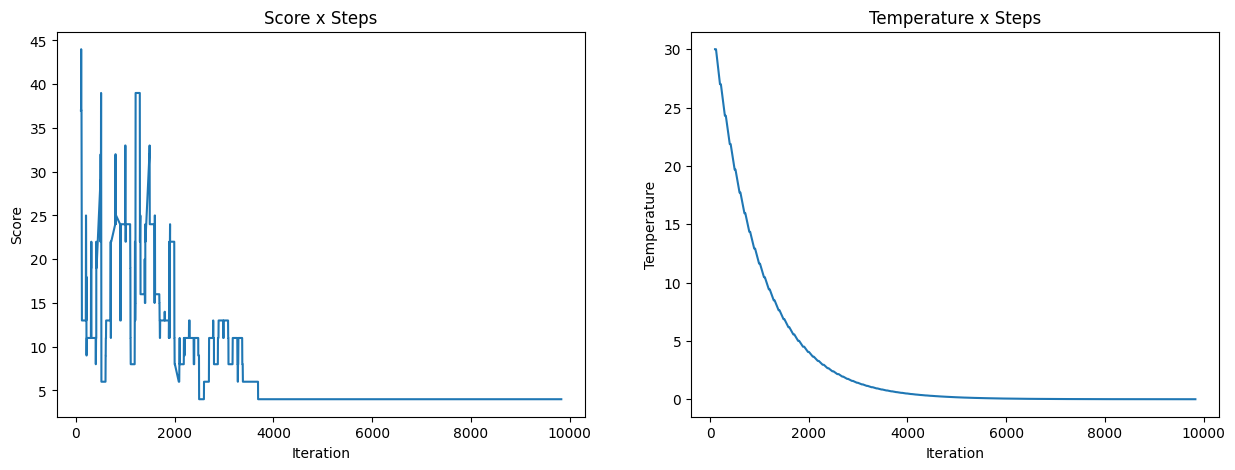

['100', '50', '30', '0.5', '238']


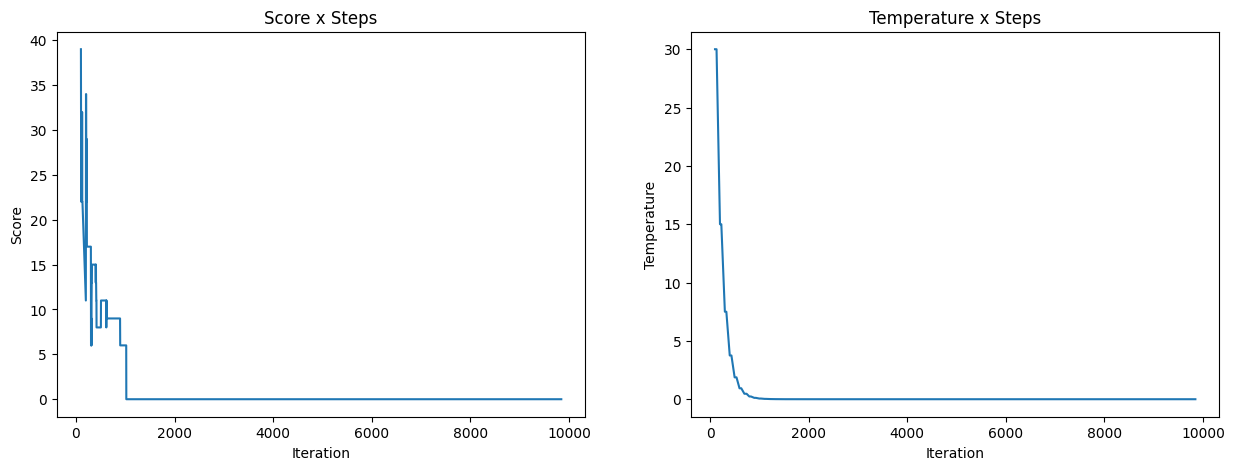

['100', '50', '30', '0.7', '238']


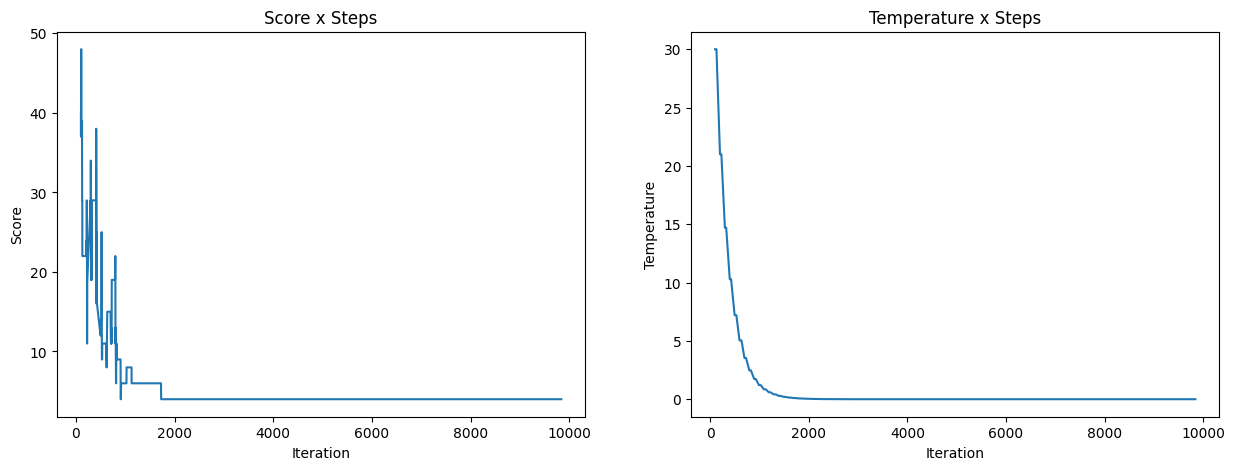

['100', '50', '30', '0.9', '238']


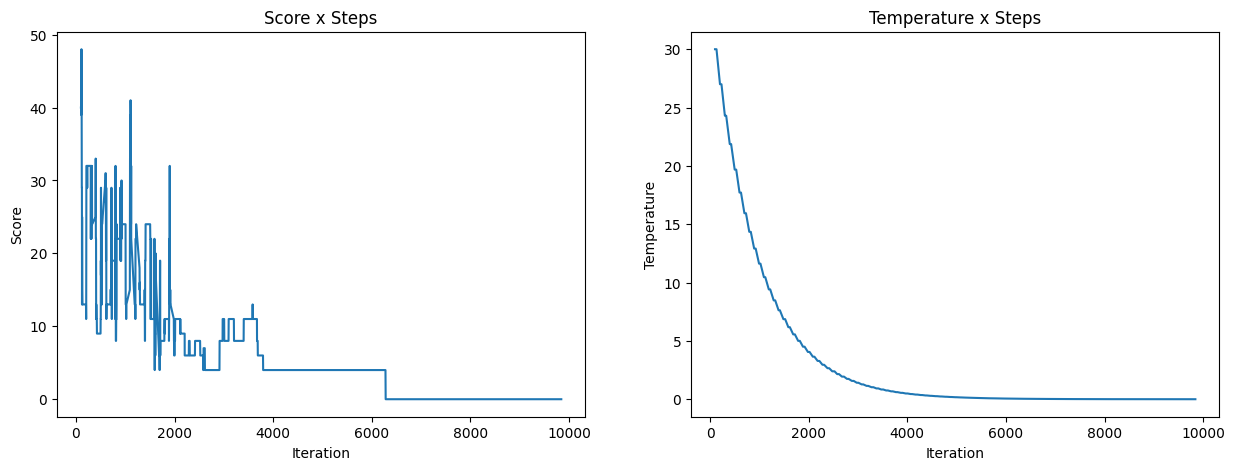

['100', '50', '50', '0.5', '238']


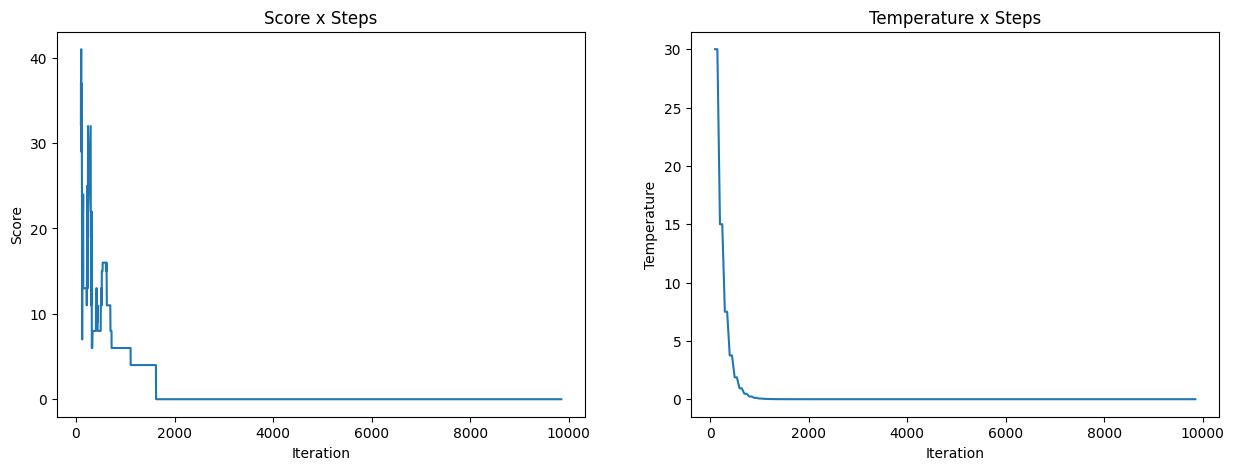

['100', '50', '50', '0.7', '238']


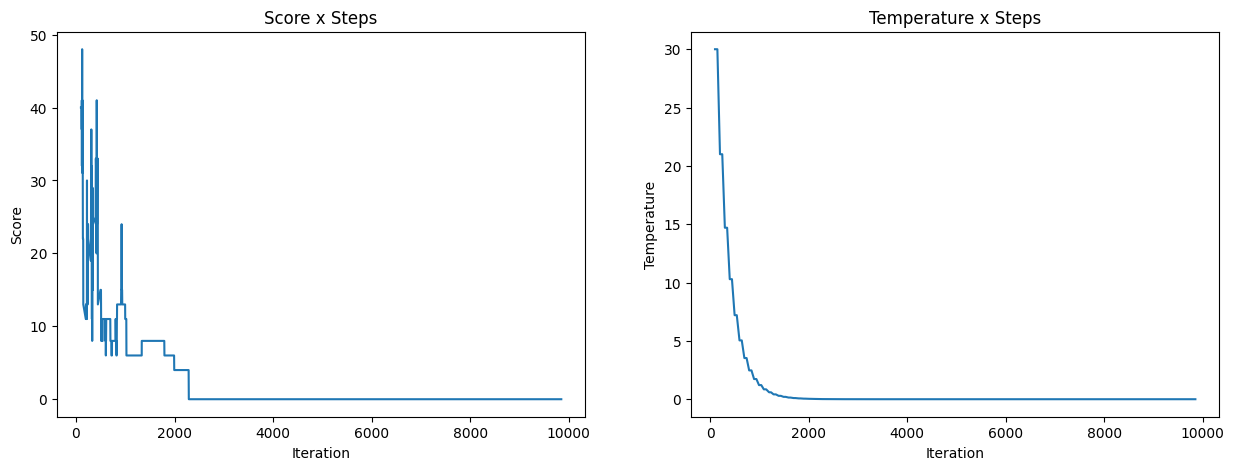

['100', '50', '50', '0.9', '238']


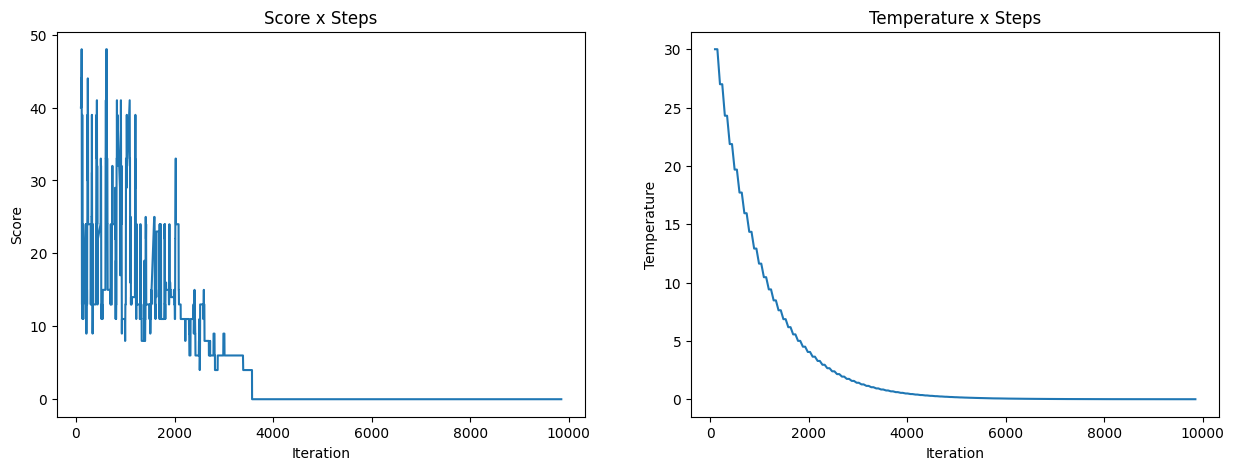

['100', '100', '20', '0.5', '238']


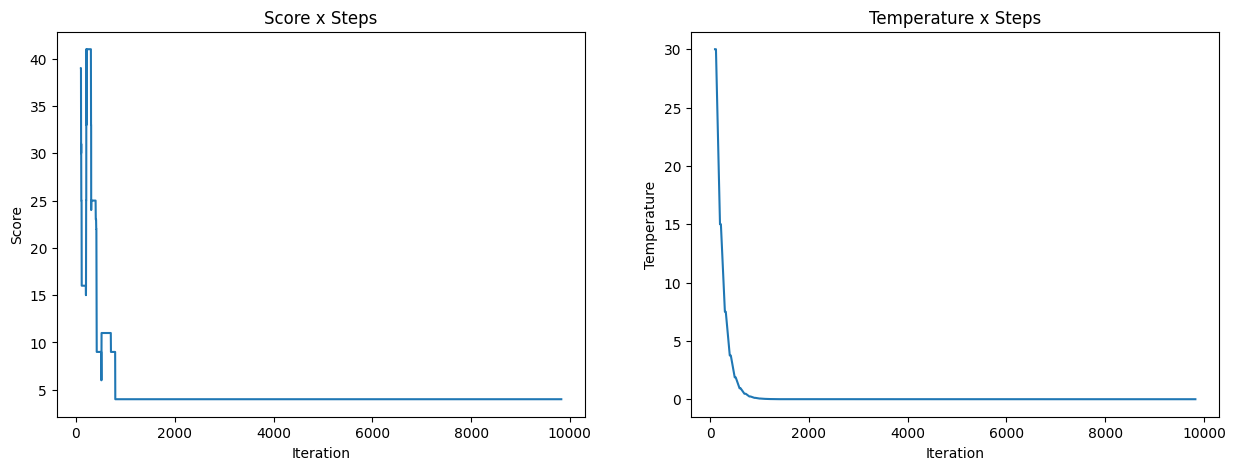

['100', '100', '20', '0.7', '238']


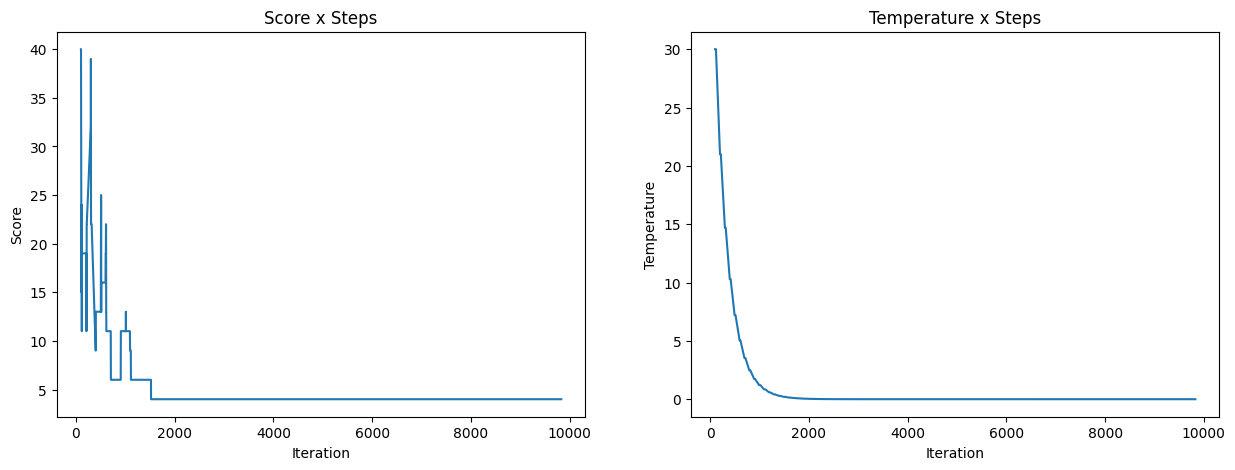

['100', '100', '20', '0.9', '238']


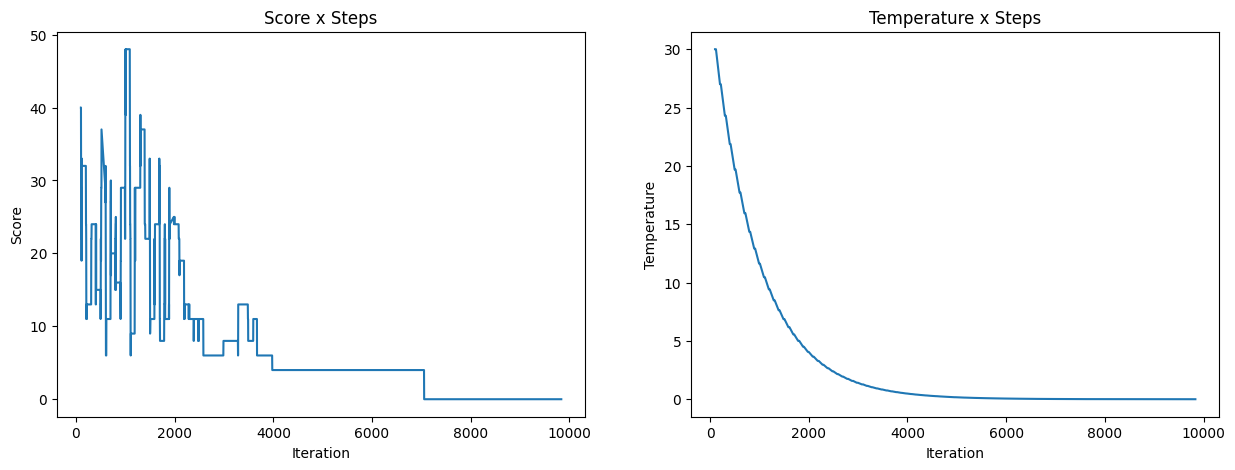

['100', '100', '30', '0.5', '238']


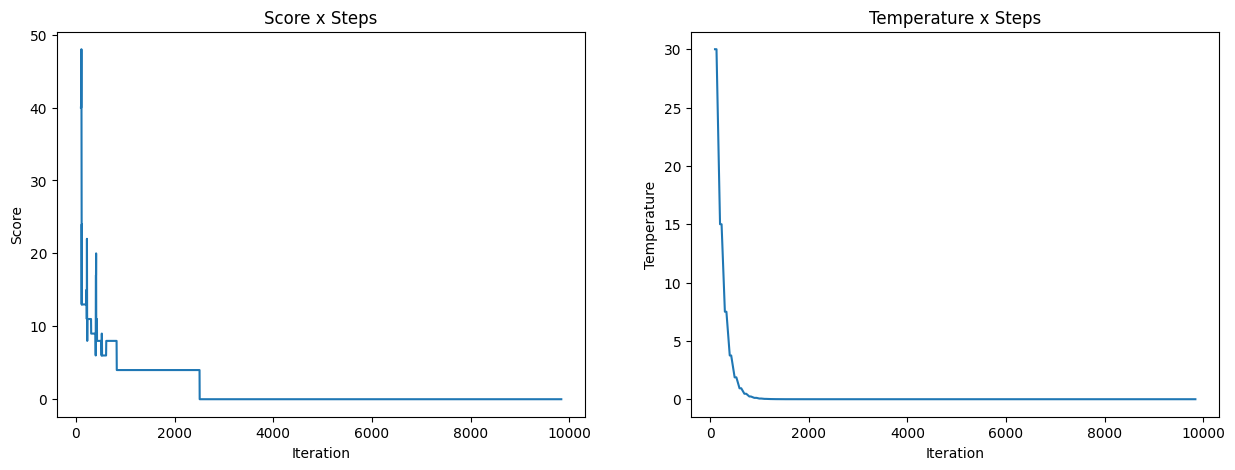

['100', '100', '30', '0.7', '238']


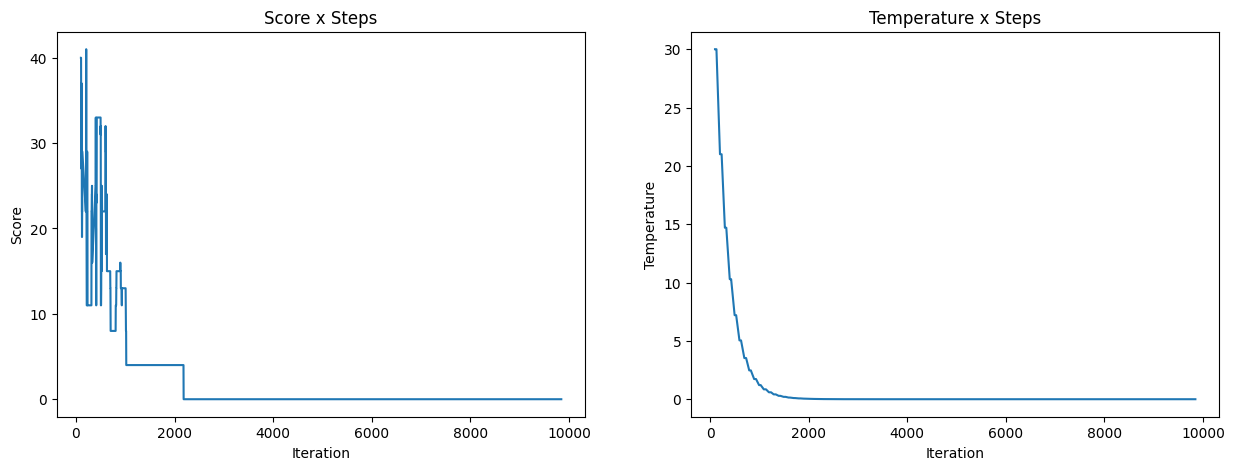

['100', '100', '30', '0.9', '238']


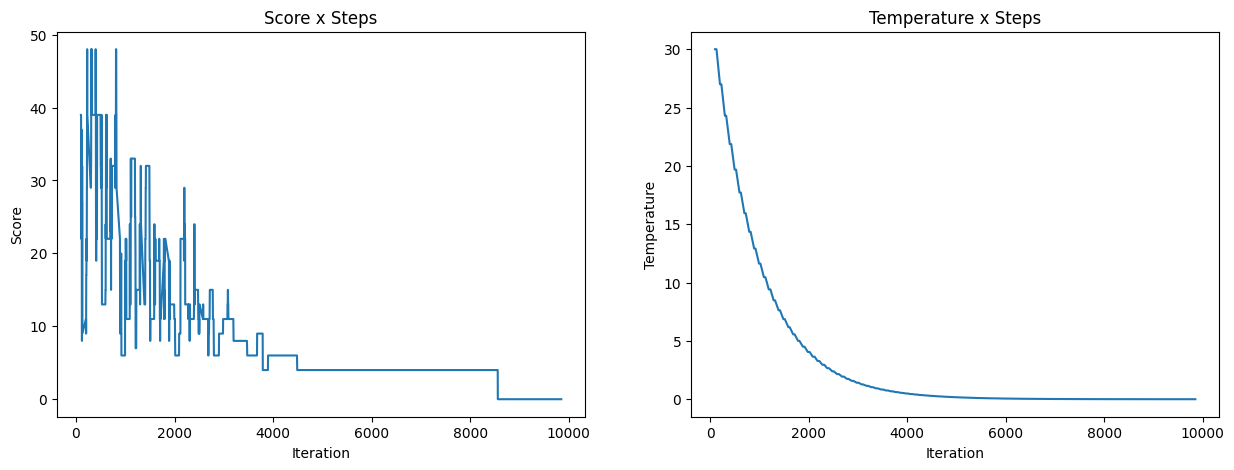

['100', '100', '50', '0.5', '238']


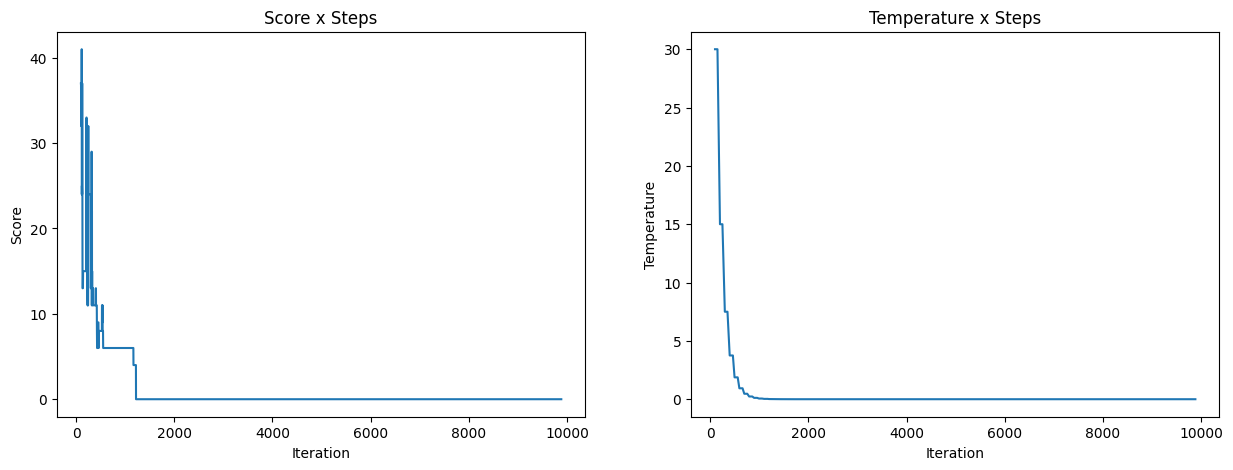

['100', '100', '50', '0.7', '238']


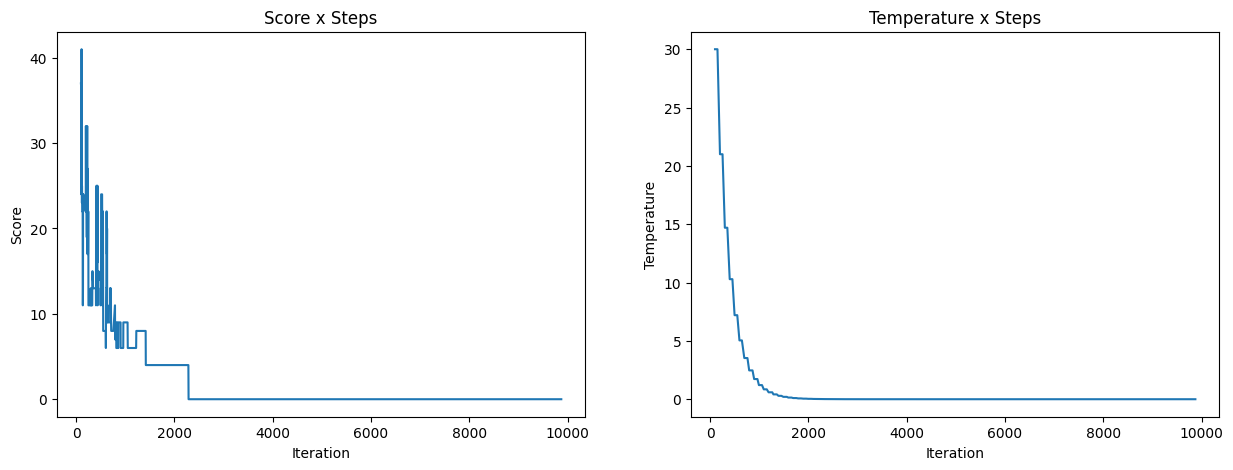

['100', '100', '50', '0.9', '238']


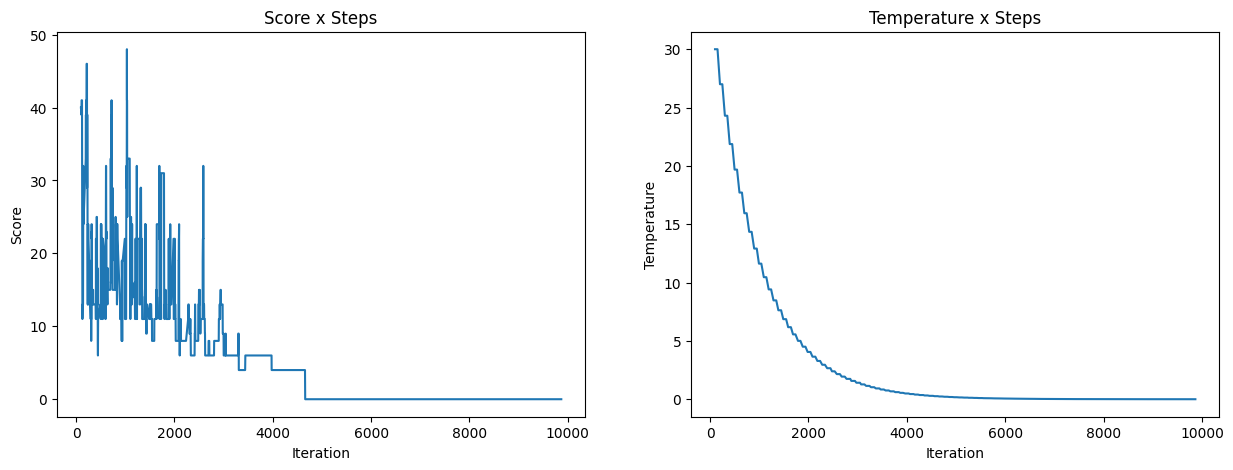

['100', '200', '20', '0.5', '238']


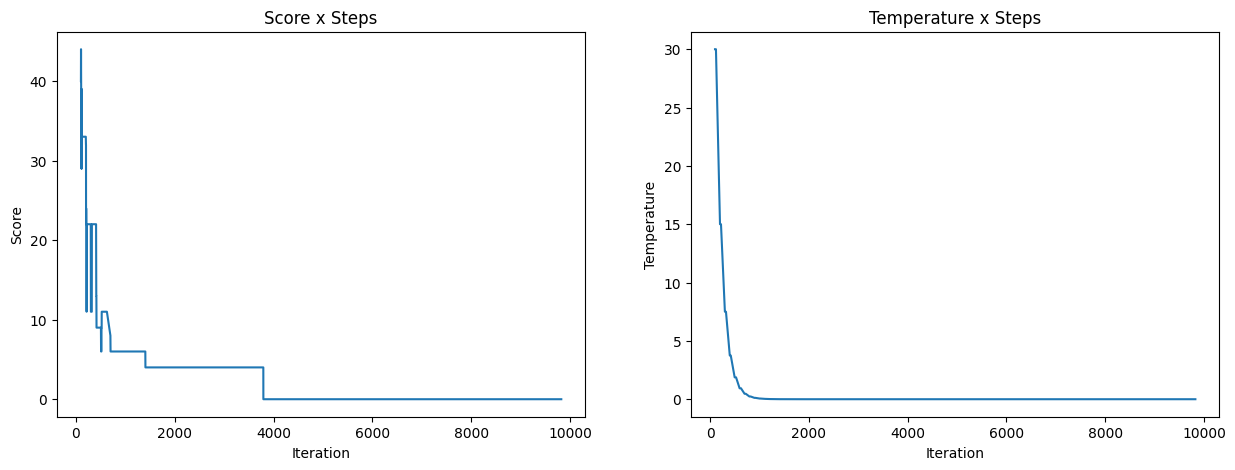

['100', '200', '20', '0.7', '238']


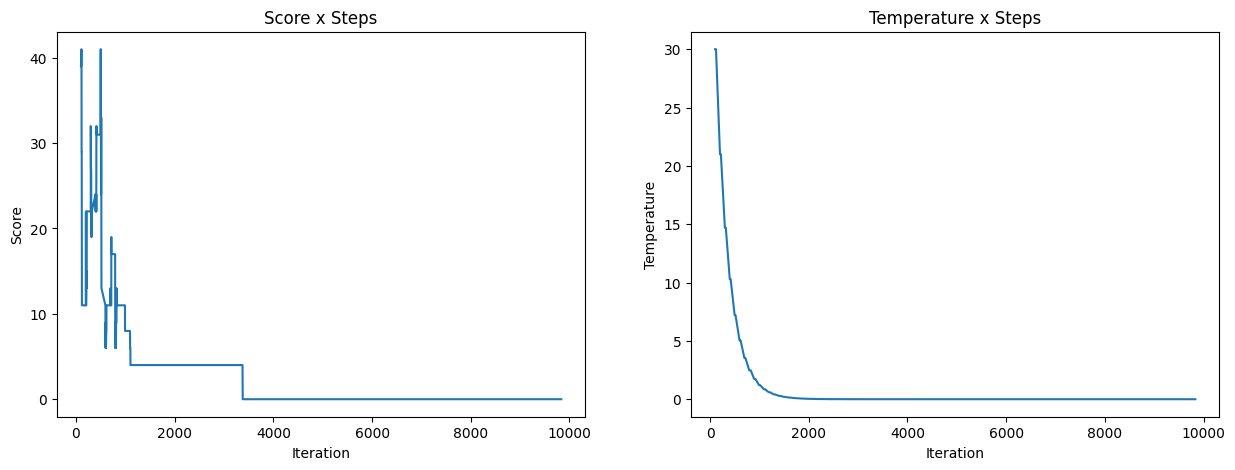

['100', '200', '20', '0.9', '238']


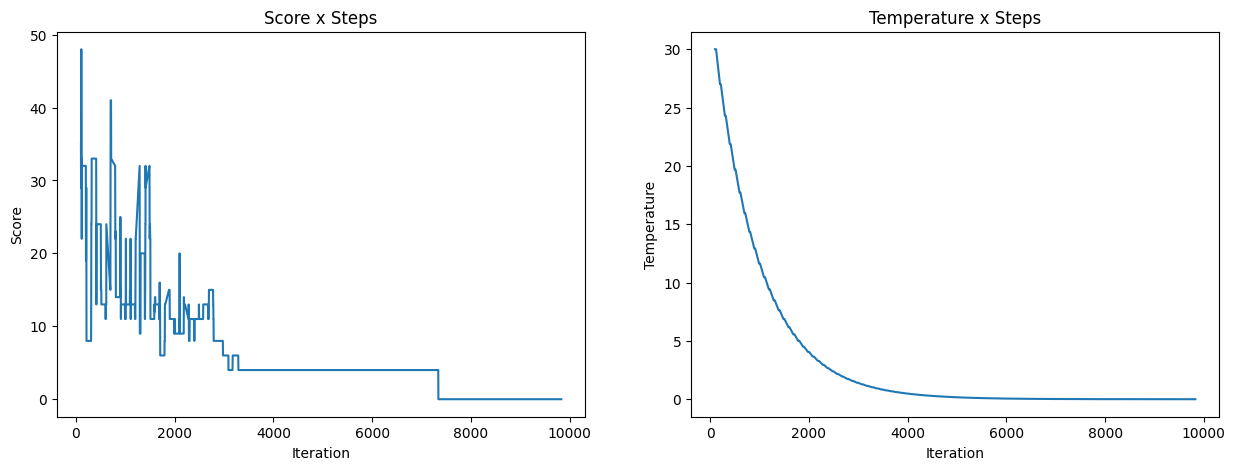

['100', '200', '30', '0.5', '238']


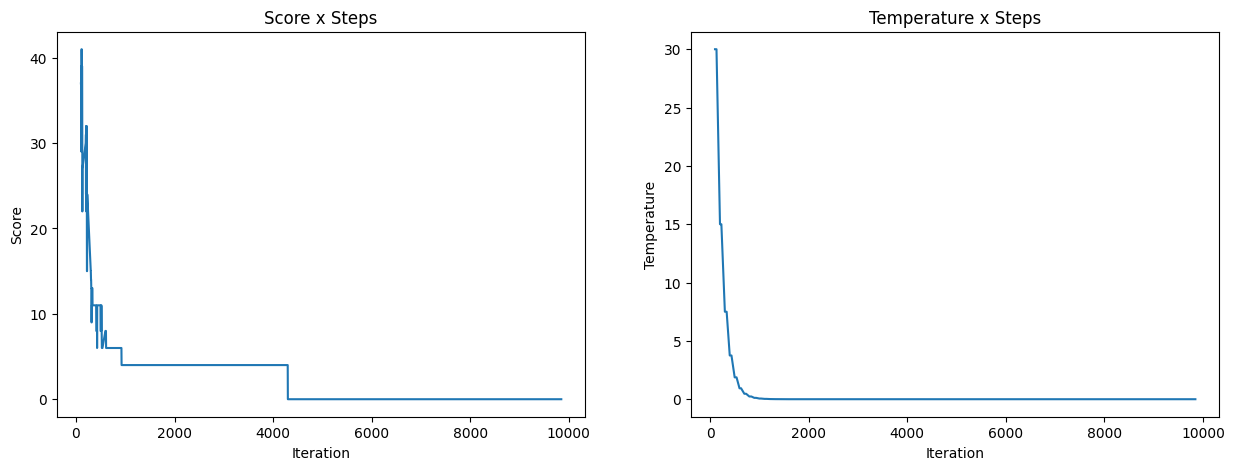

['100', '200', '30', '0.7', '238']


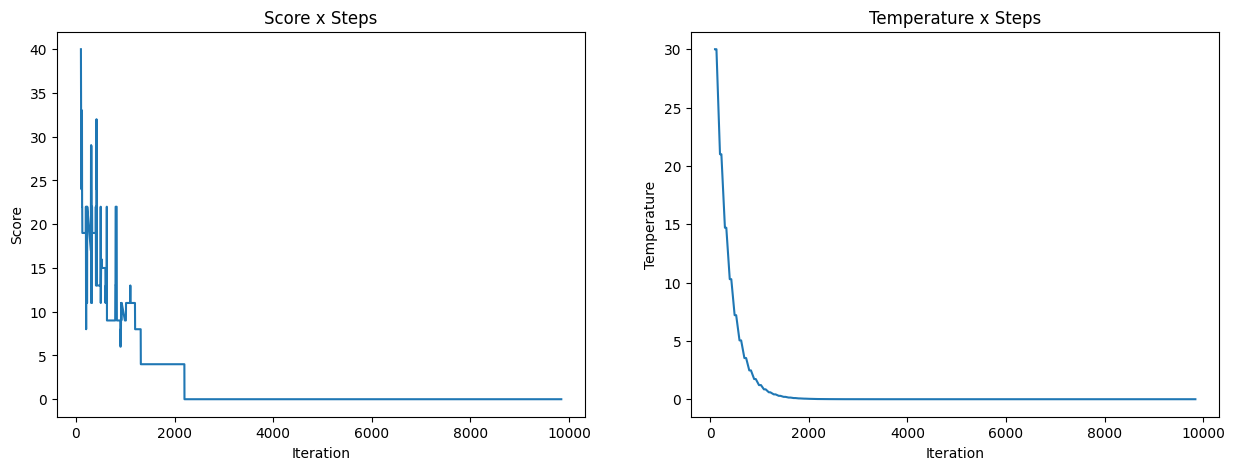

['100', '200', '30', '0.9', '238']


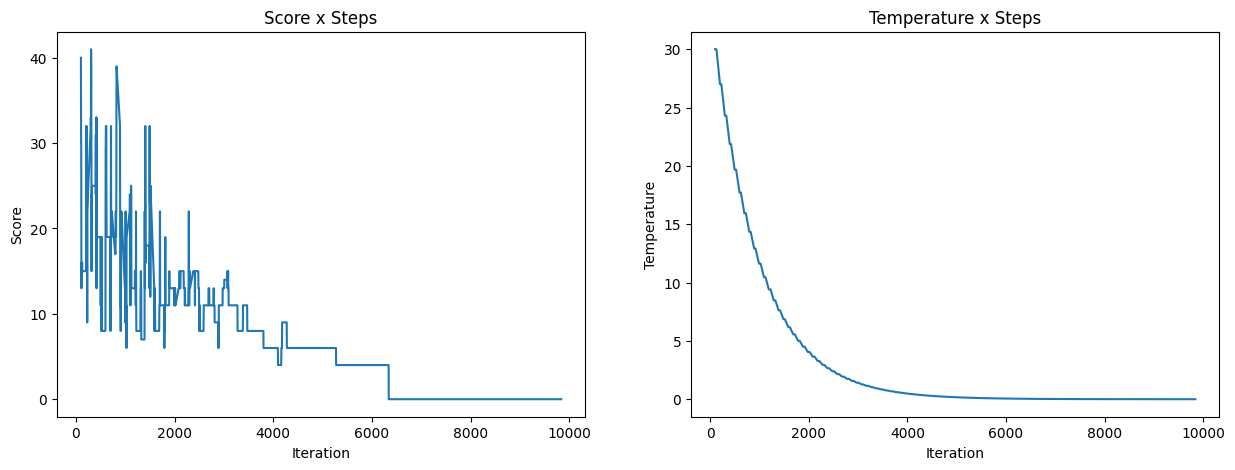

['100', '200', '50', '0.5', '238']


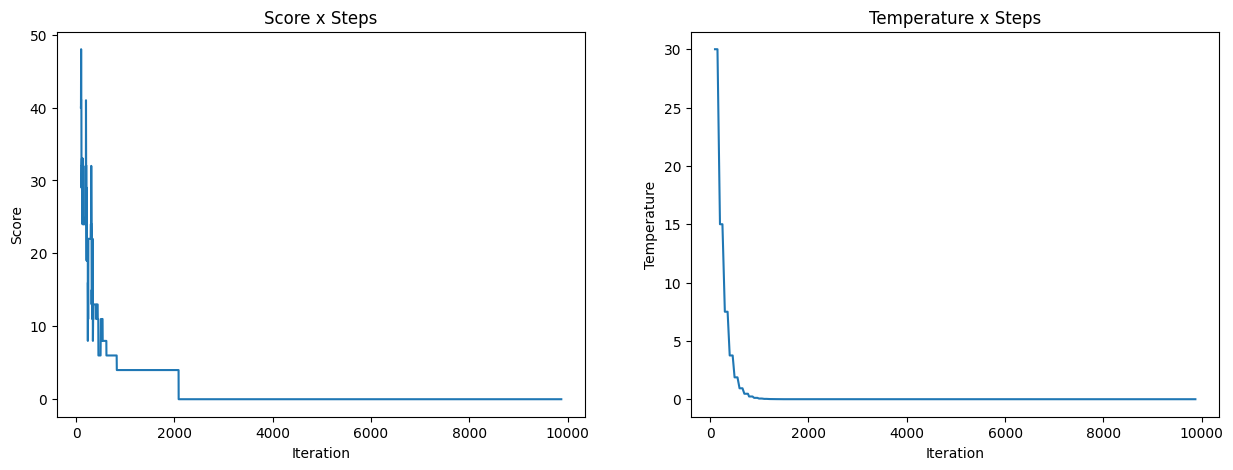

['100', '200', '50', '0.7', '238']


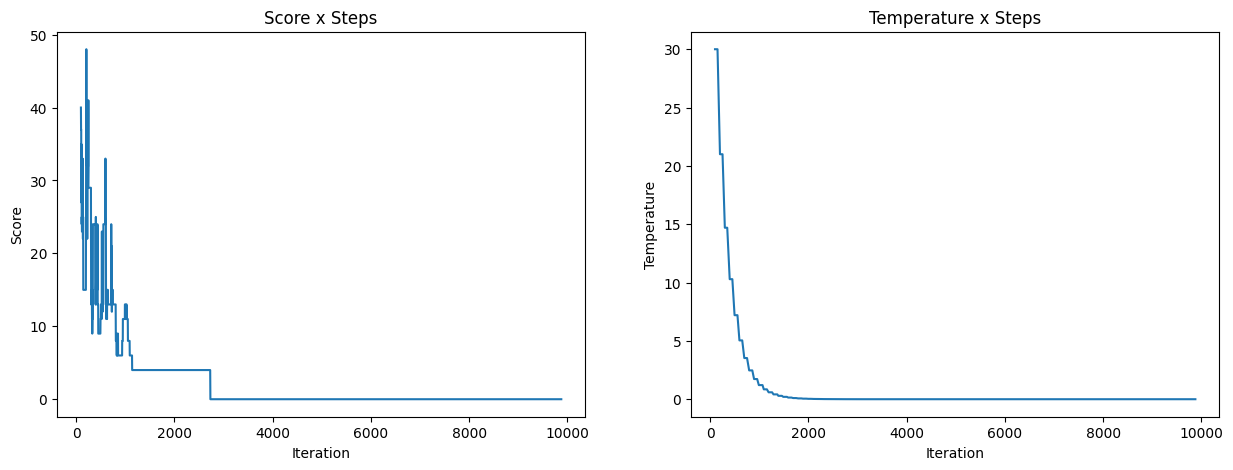

['100', '200', '50', '0.9', '238']


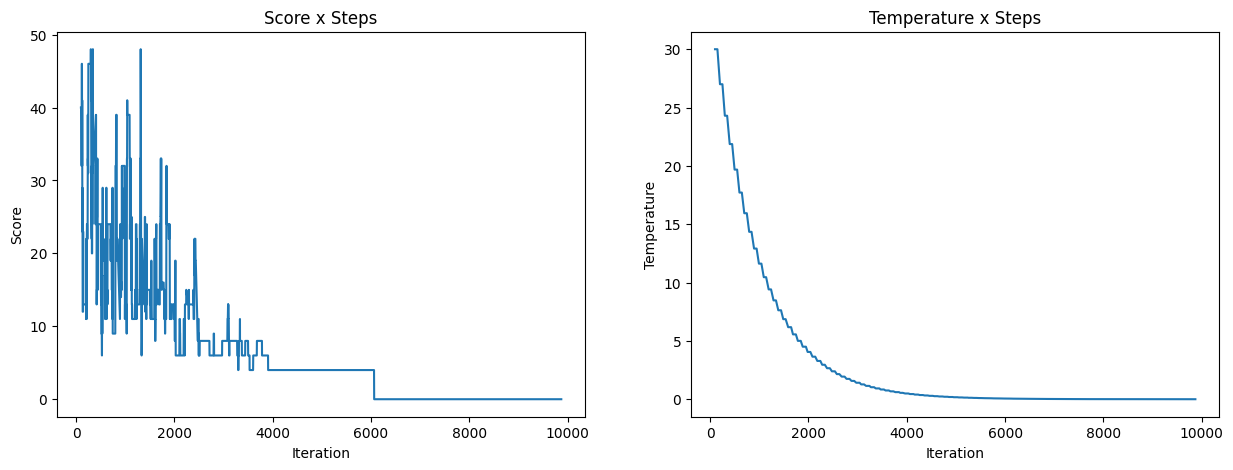

['200', '50', '20', '0.5', '238']


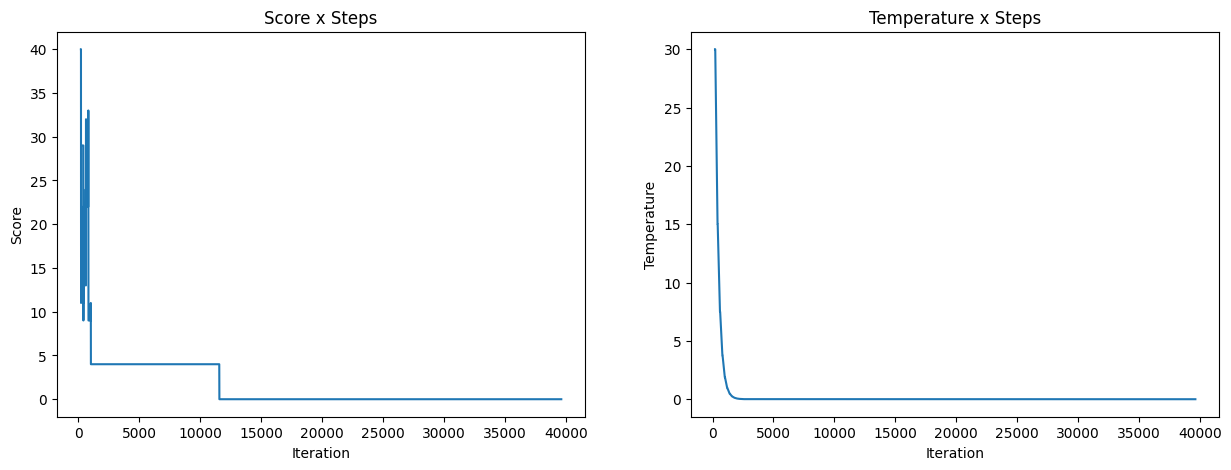

['200', '50', '20', '0.7', '238']


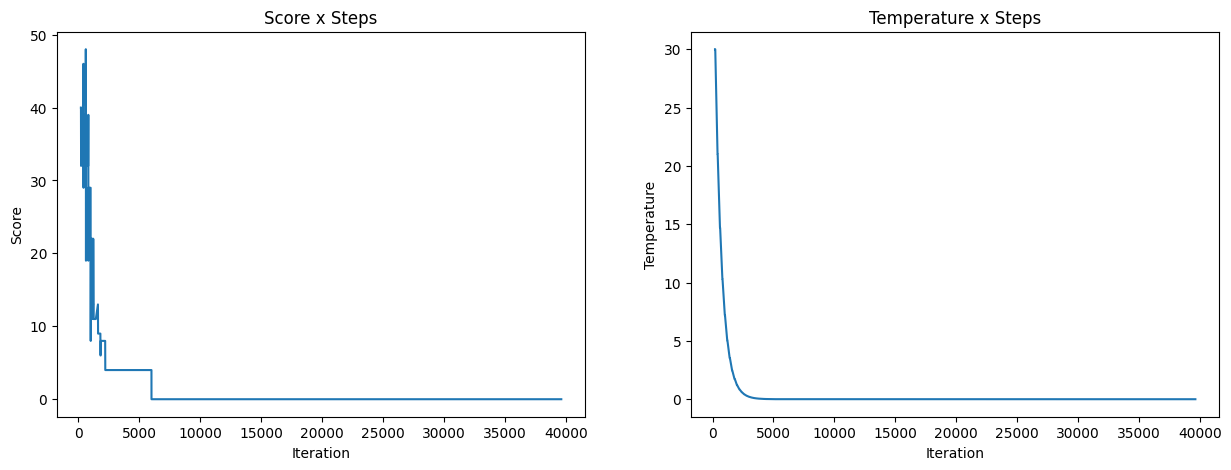

['200', '50', '20', '0.9', '238']


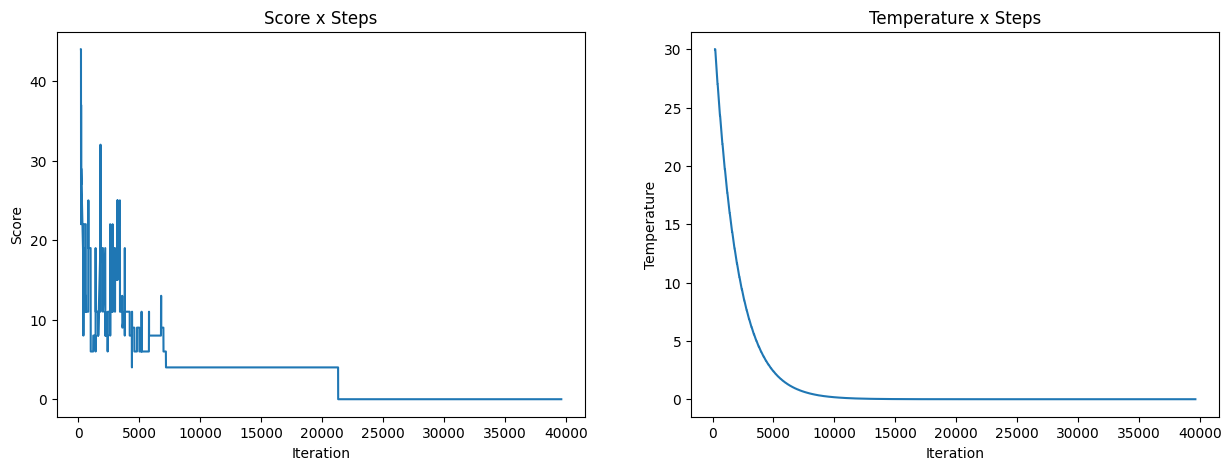

['200', '50', '30', '0.5', '238']


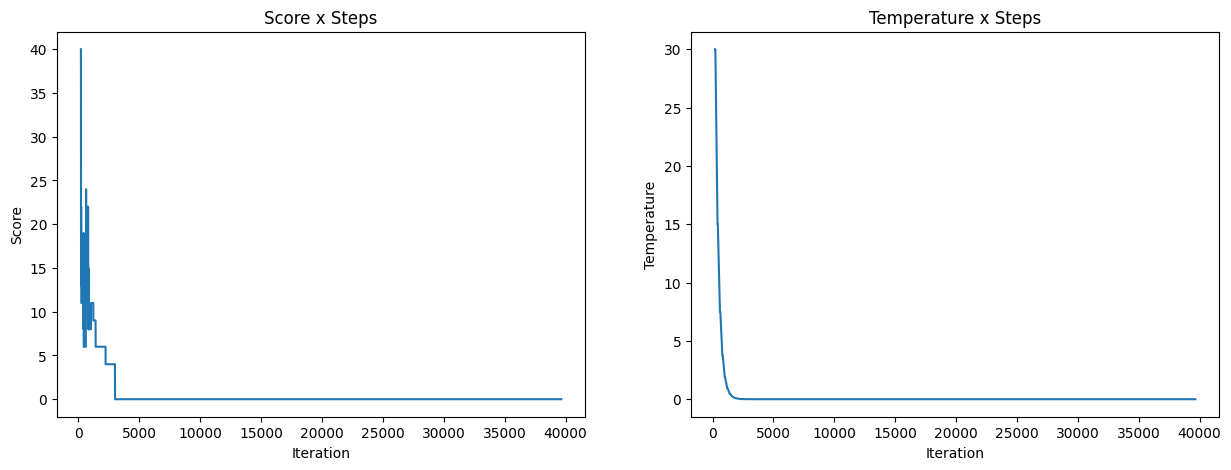

['200', '50', '30', '0.7', '238']


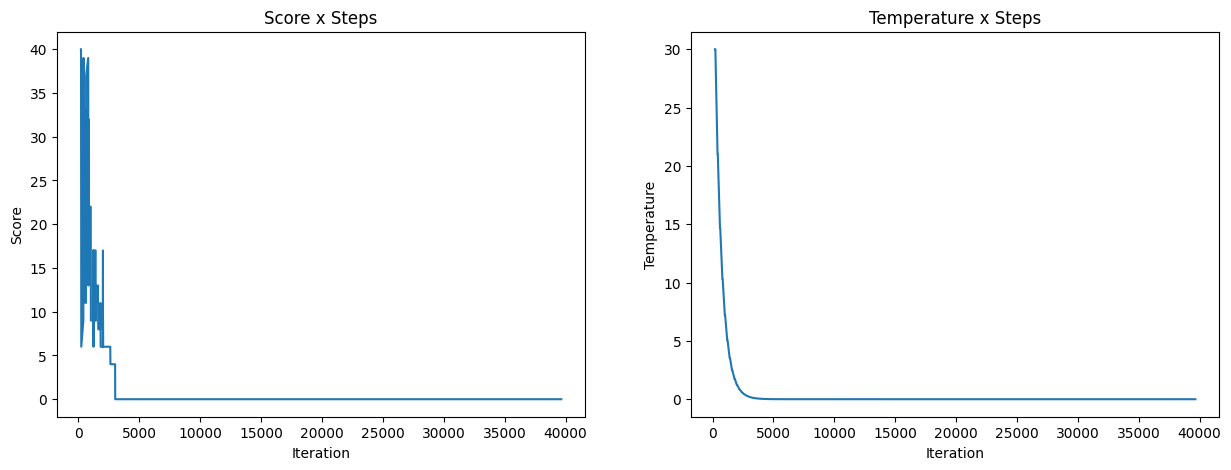

['200', '50', '30', '0.9', '238']


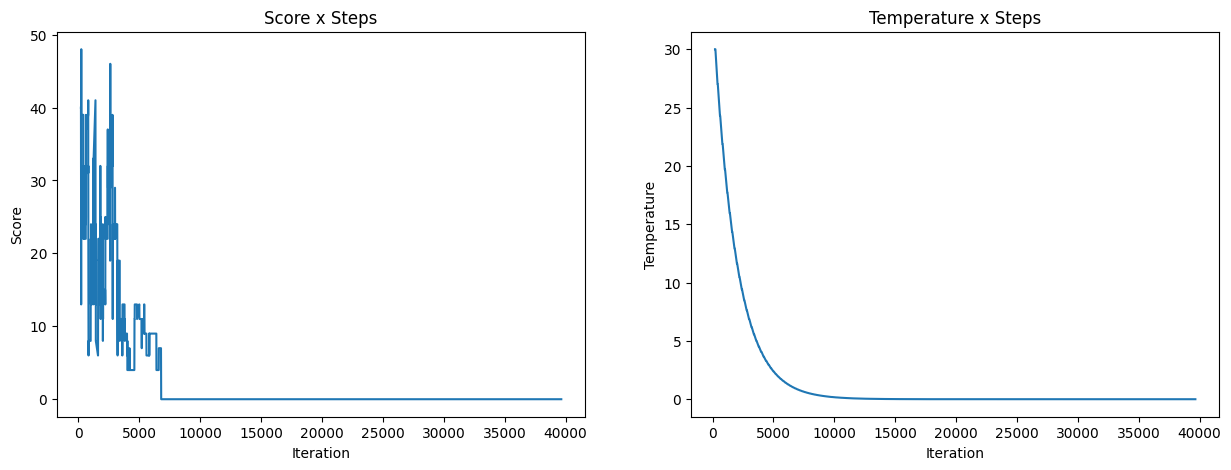

['200', '50', '50', '0.5', '238']


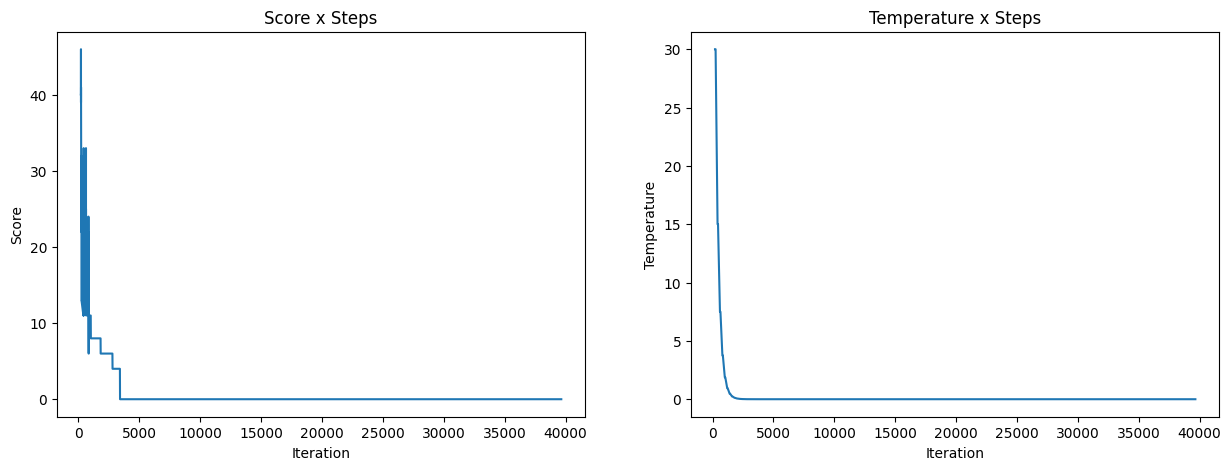

['200', '50', '50', '0.7', '238']


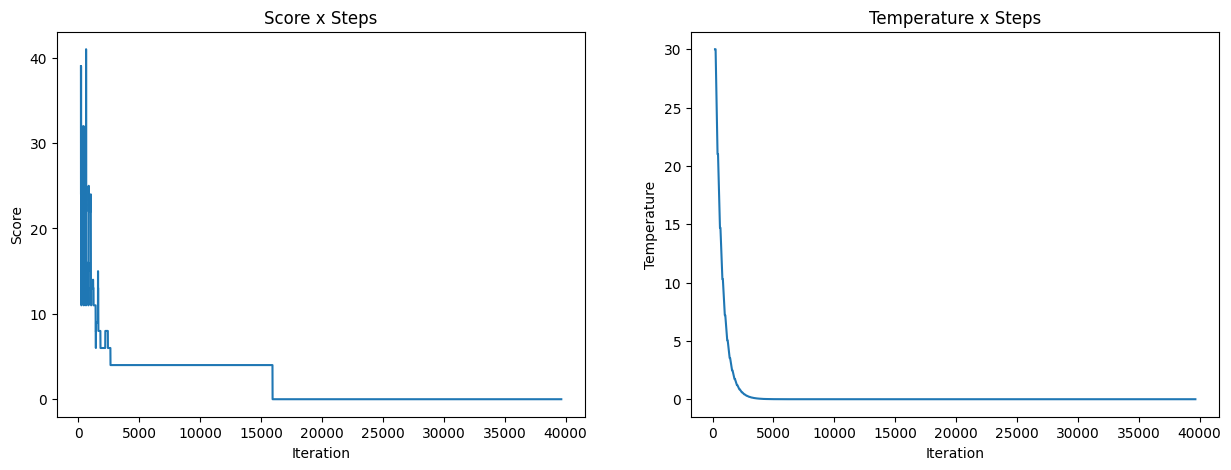

['200', '50', '50', '0.9', '238']


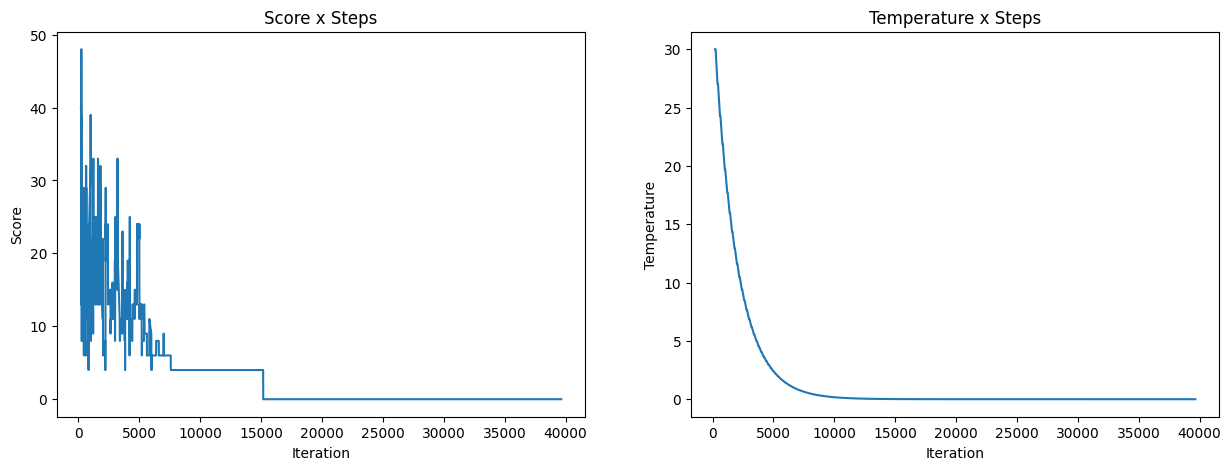

['200', '100', '20', '0.5', '238']


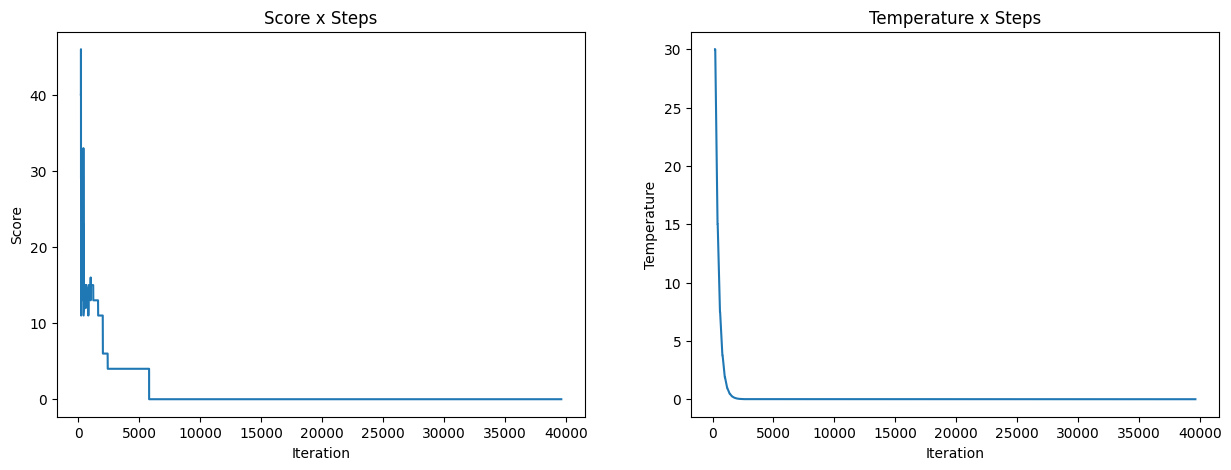

['200', '100', '20', '0.7', '238']


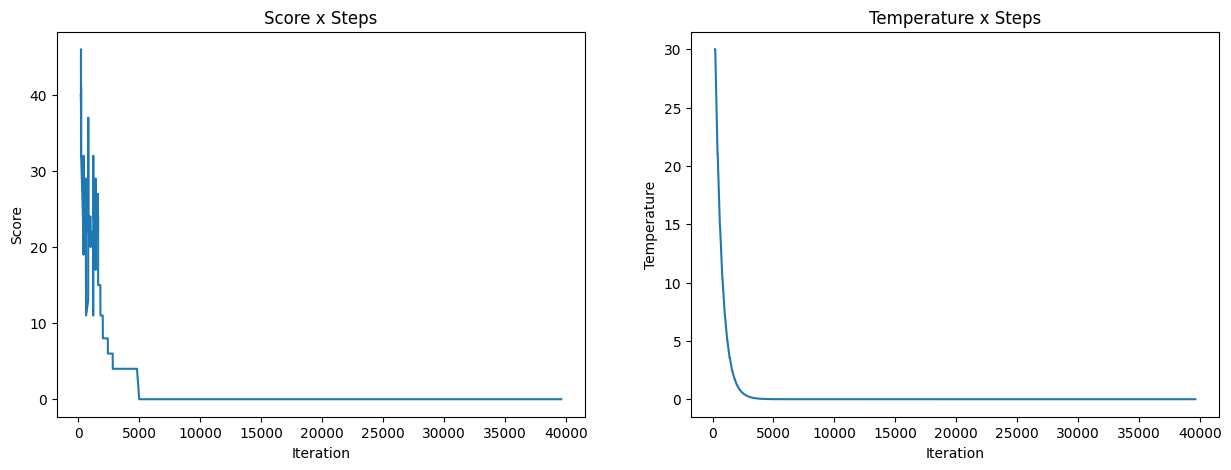

['200', '100', '20', '0.9', '238']


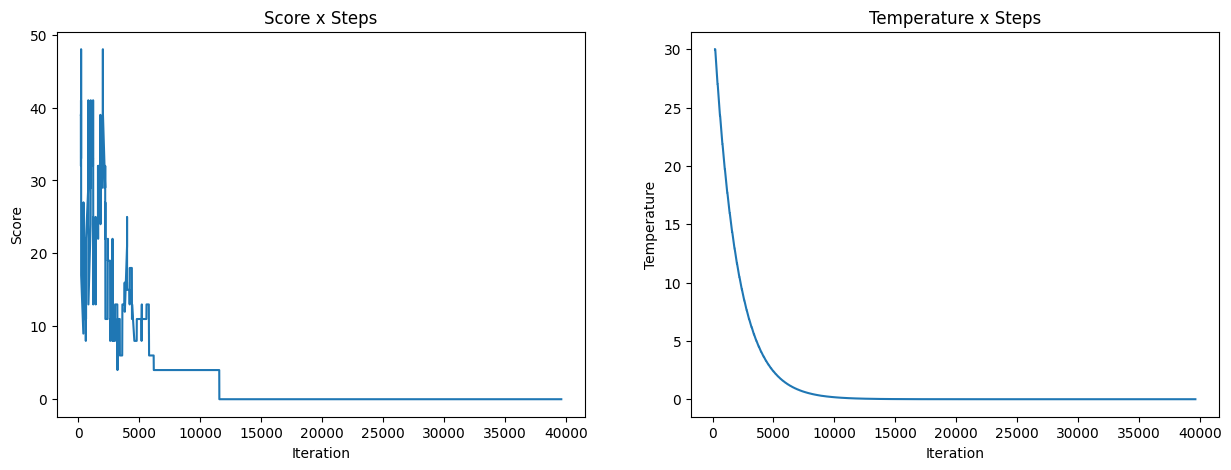

['200', '100', '30', '0.5', '238']


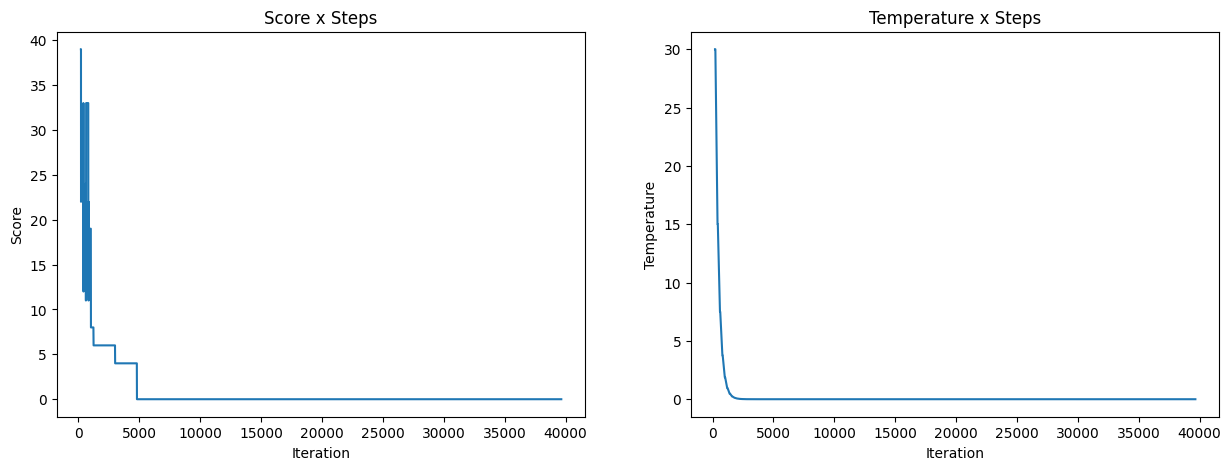

['200', '100', '30', '0.7', '238']


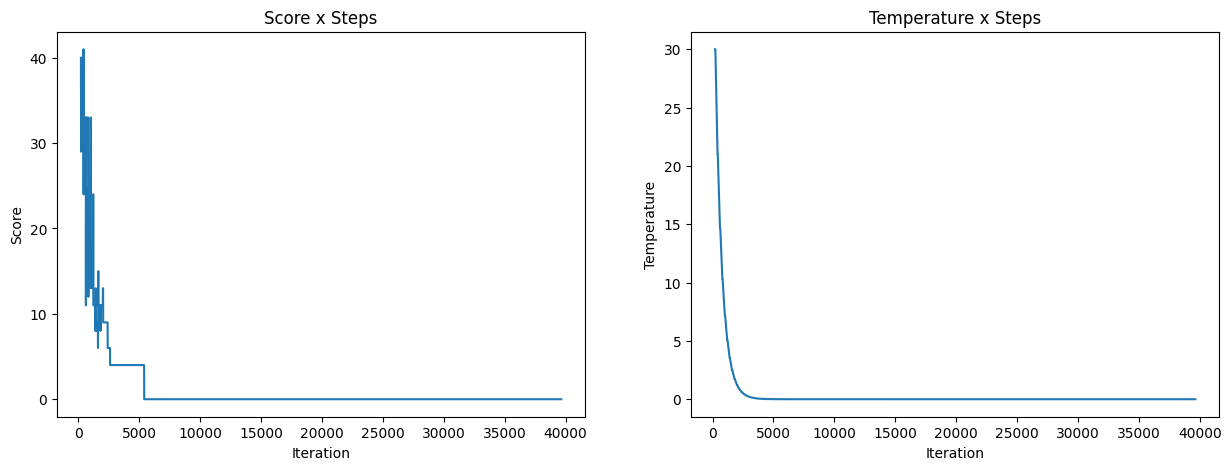

['200', '100', '30', '0.9', '238']


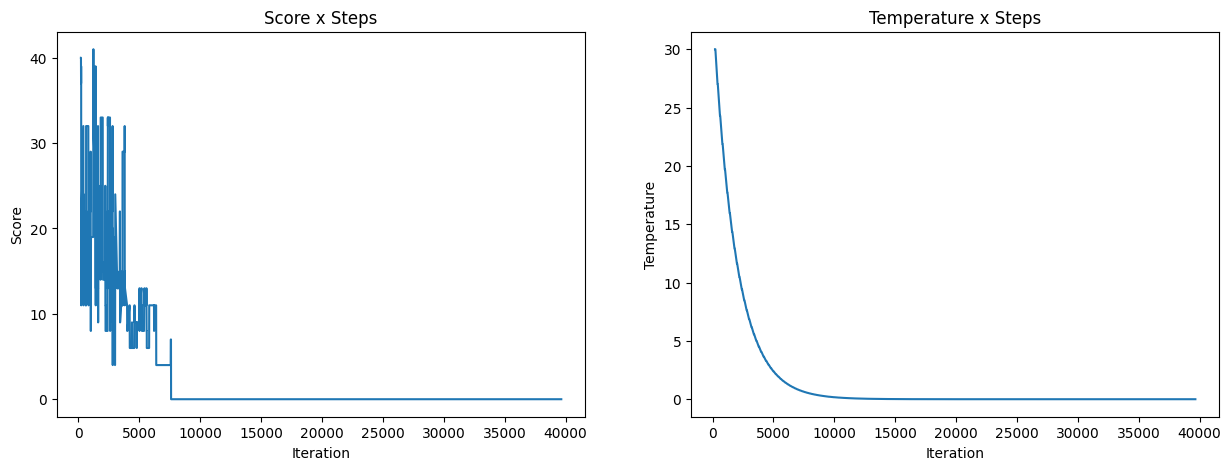

['200', '100', '50', '0.5', '238']


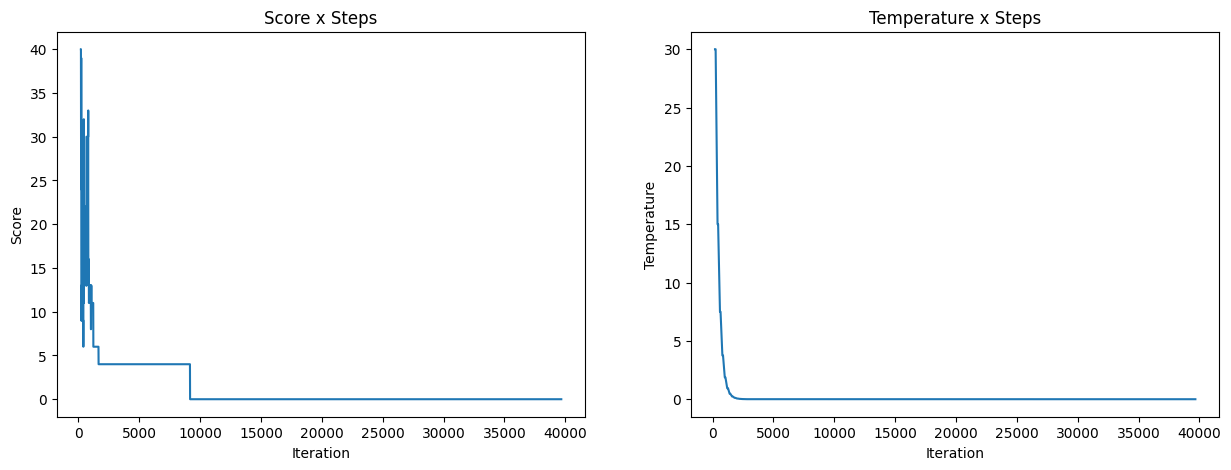

['200', '100', '50', '0.7', '238']


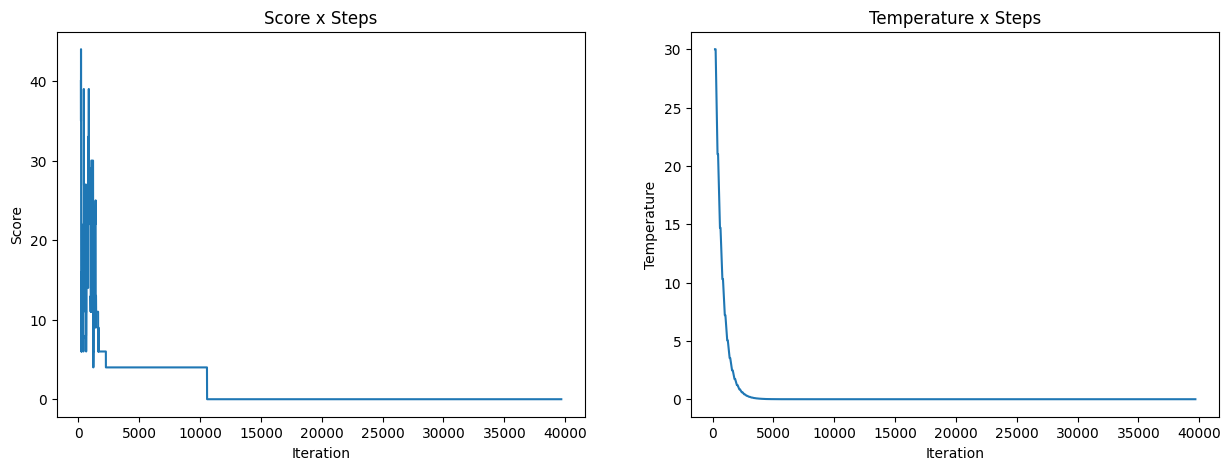

['200', '100', '50', '0.9', '238']


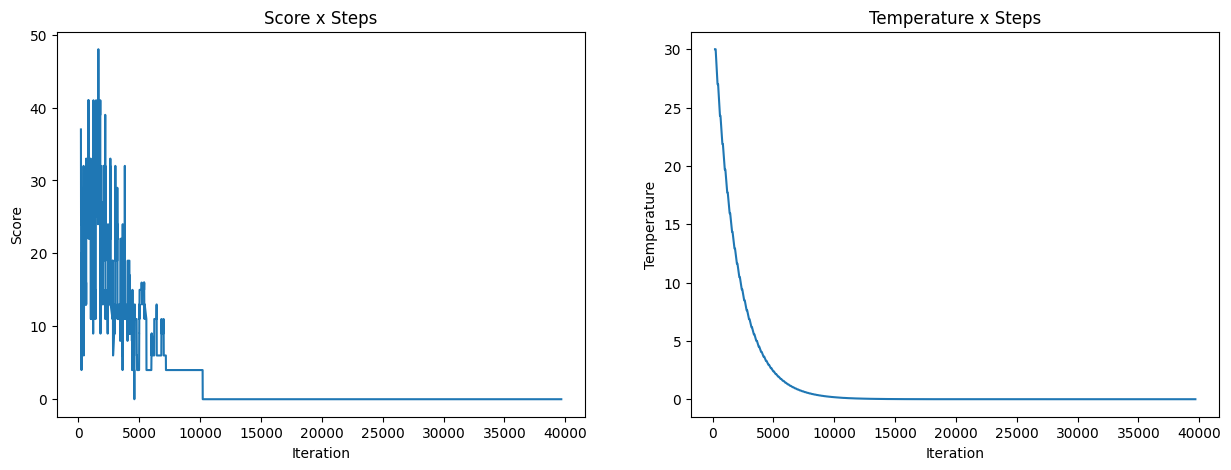

['200', '200', '20', '0.5', '238']


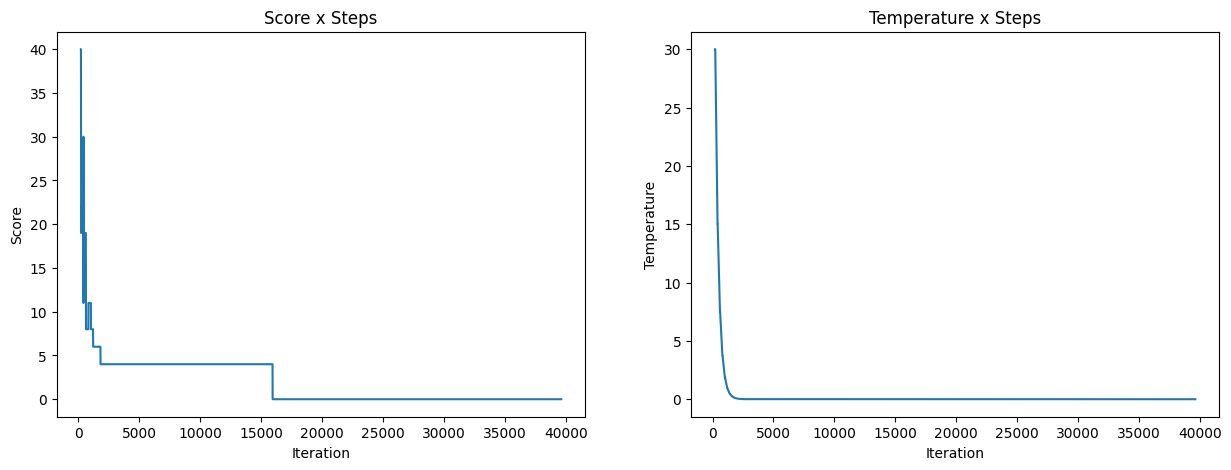

['200', '200', '20', '0.7', '238']


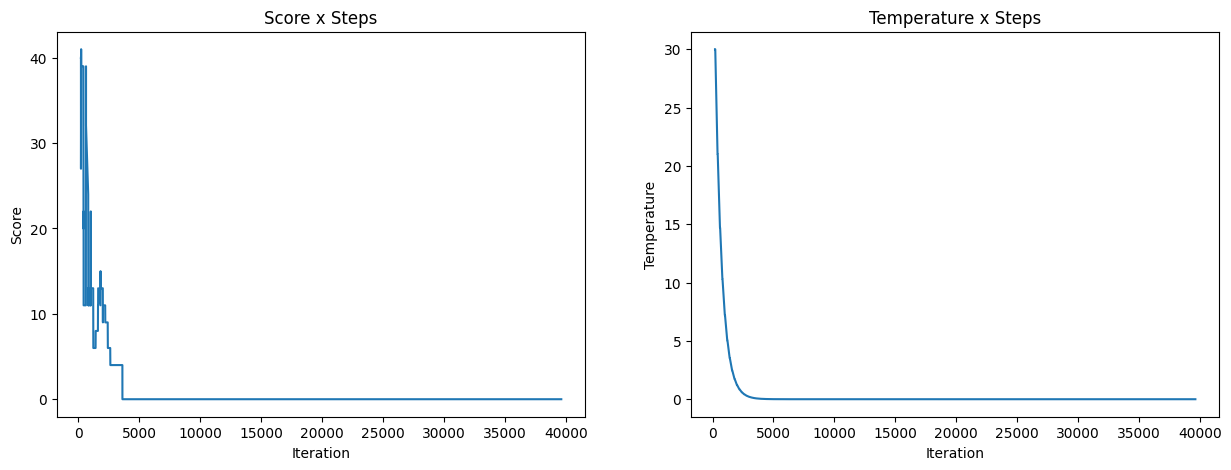

['200', '200', '20', '0.9', '238']


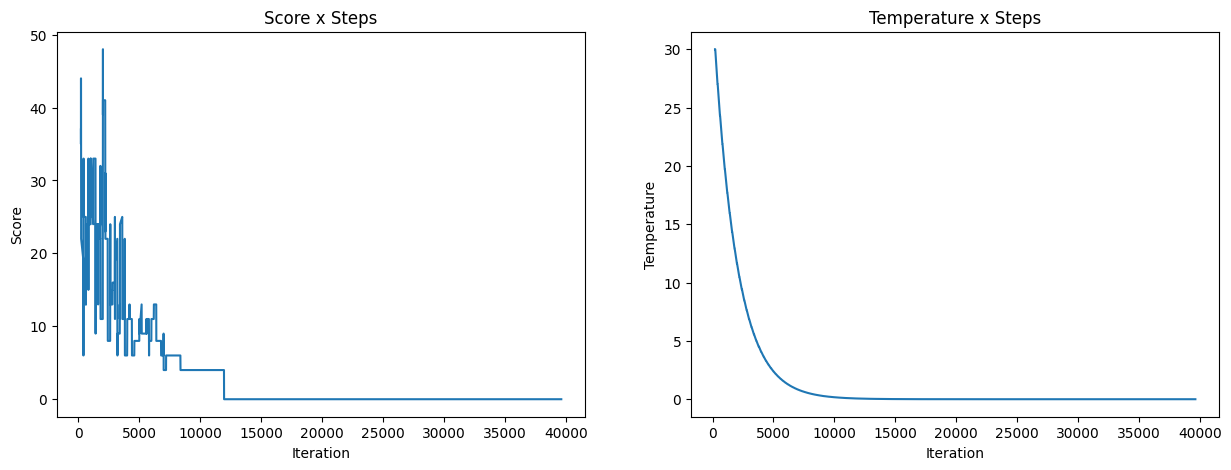

['200', '200', '30', '0.5', '238']


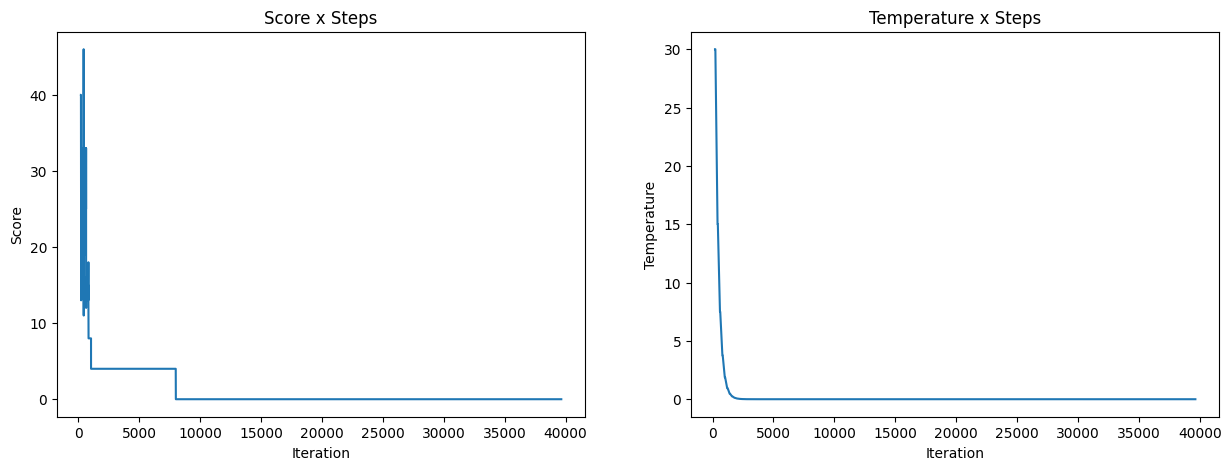

['200', '200', '30', '0.7', '238']


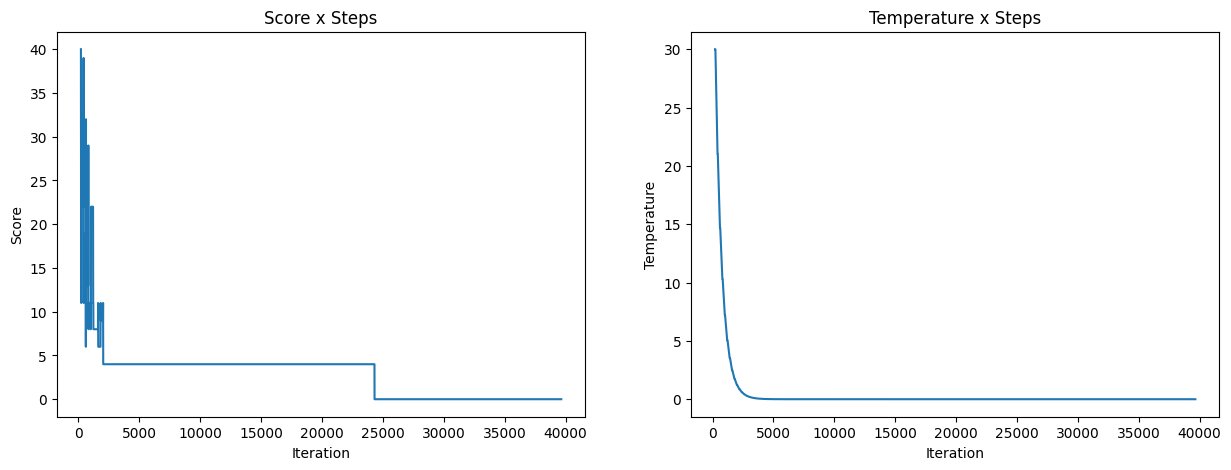

['200', '200', '30', '0.9', '238']


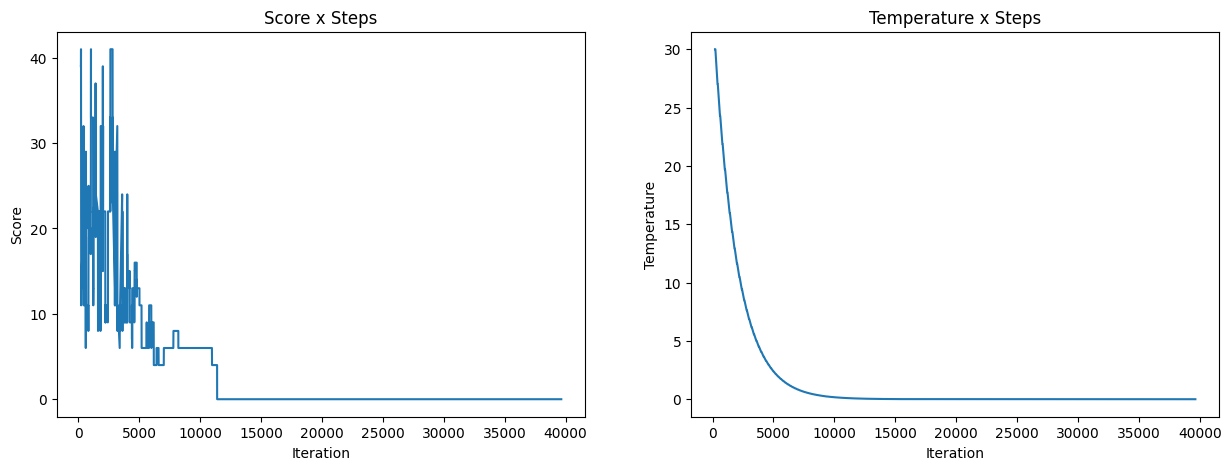

['200', '200', '50', '0.5', '238']


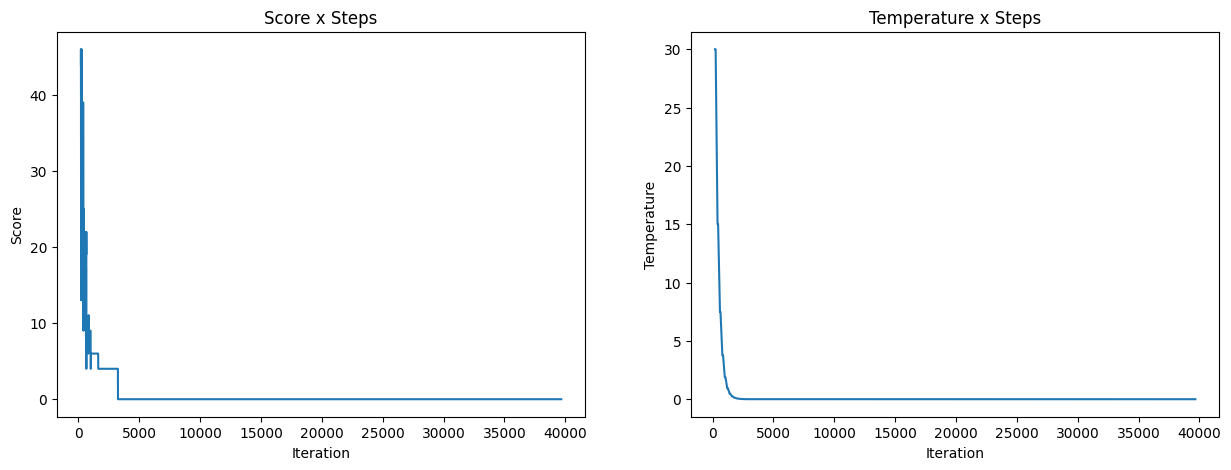

['200', '200', '50', '0.7', '238']


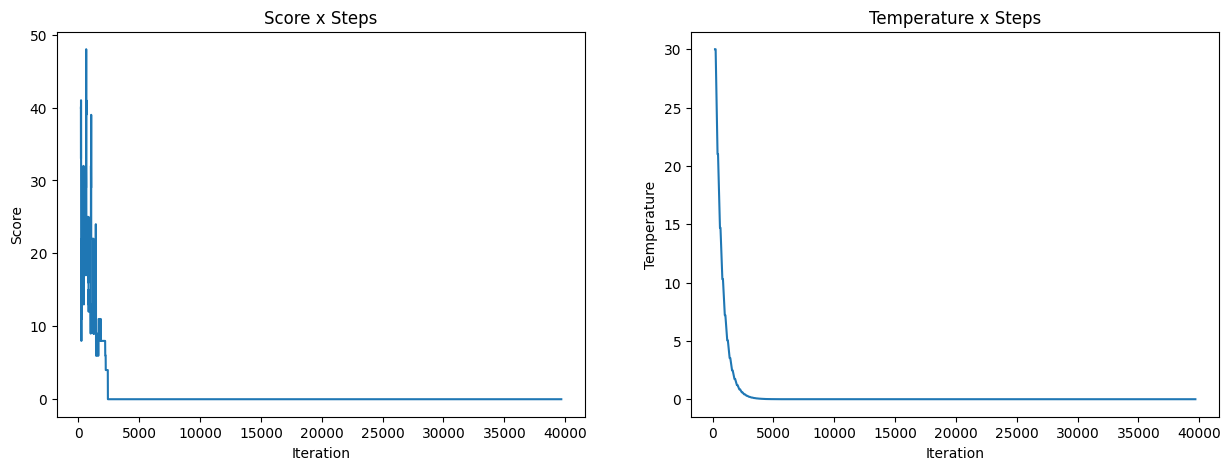

['200', '200', '50', '0.9', '238']


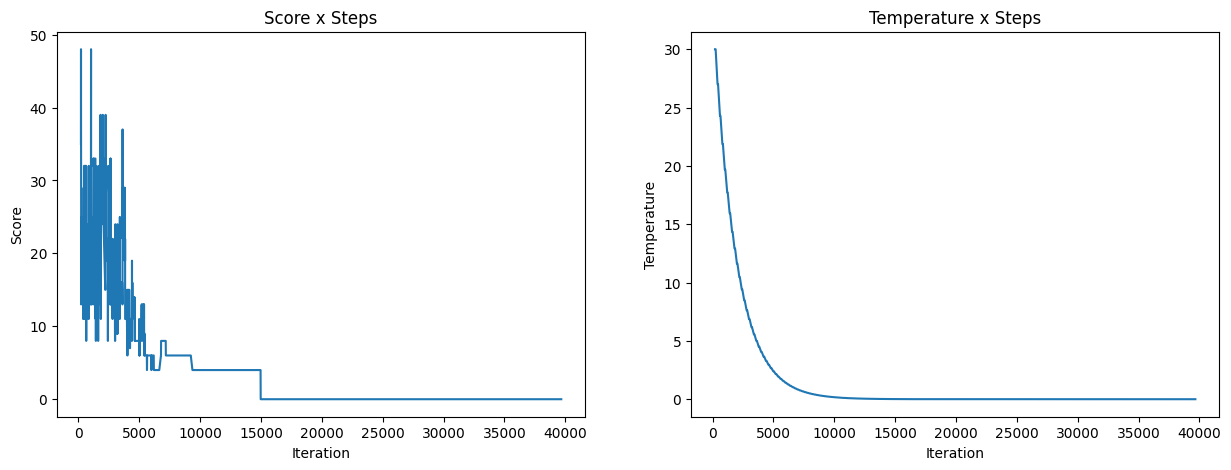

['300', '50', '20', '0.5', '238']


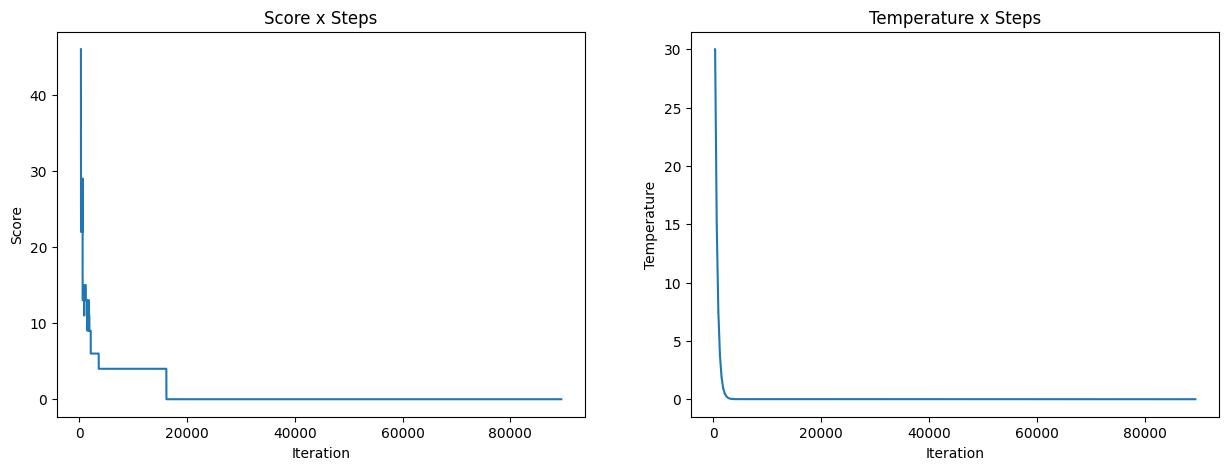

['300', '50', '20', '0.7', '238']


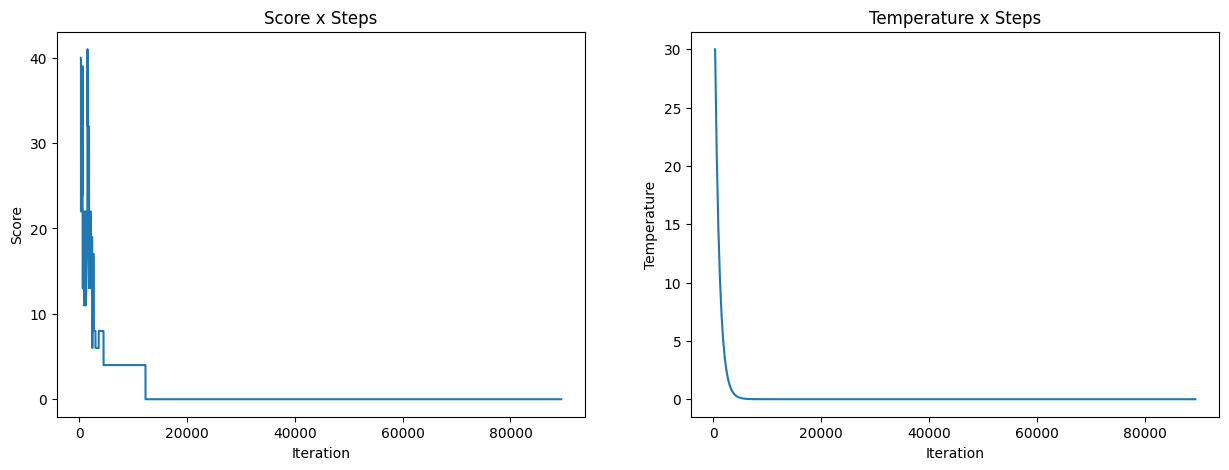

['300', '50', '20', '0.9', '238']


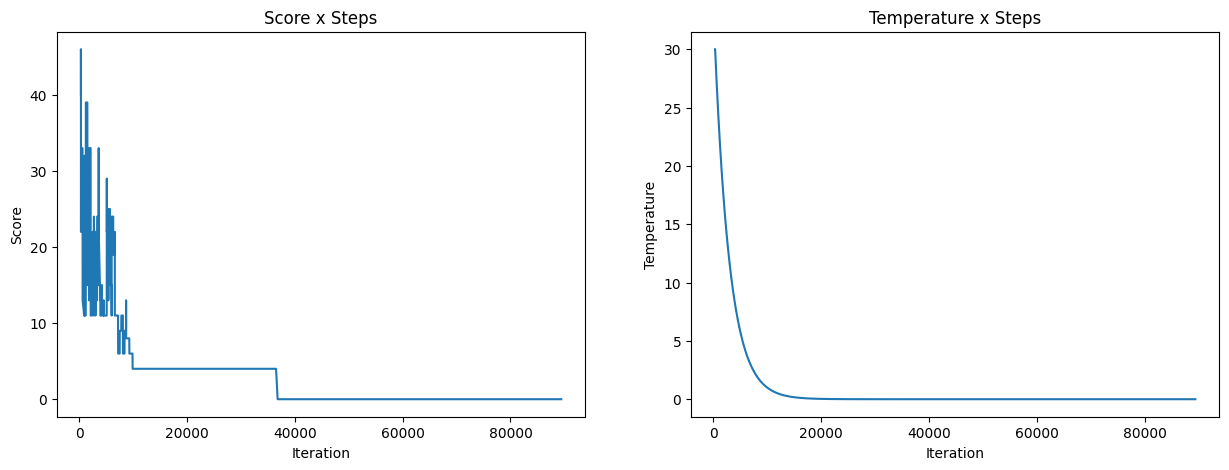

['300', '50', '30', '0.5', '238']


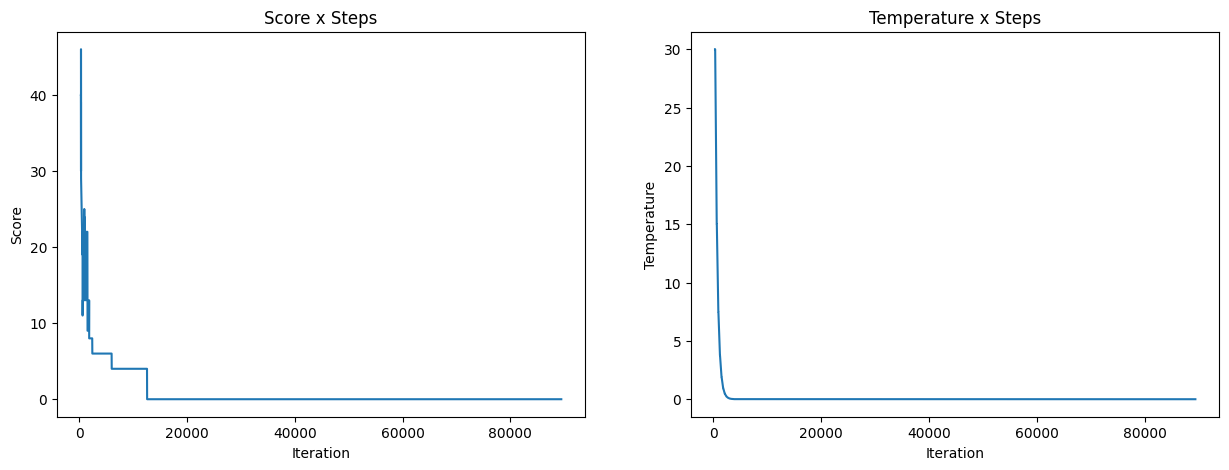

['300', '50', '30', '0.7', '238']


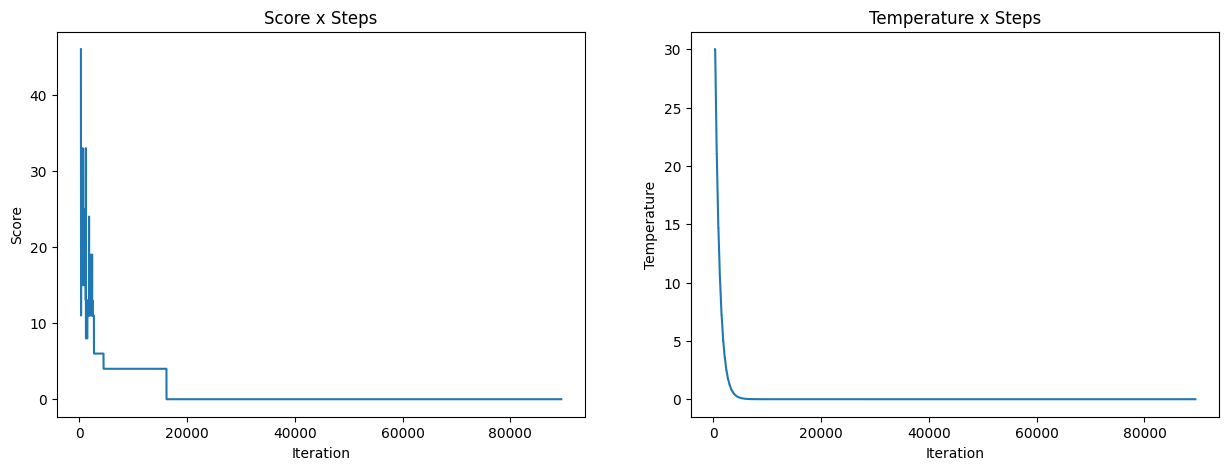

['300', '50', '30', '0.9', '238']


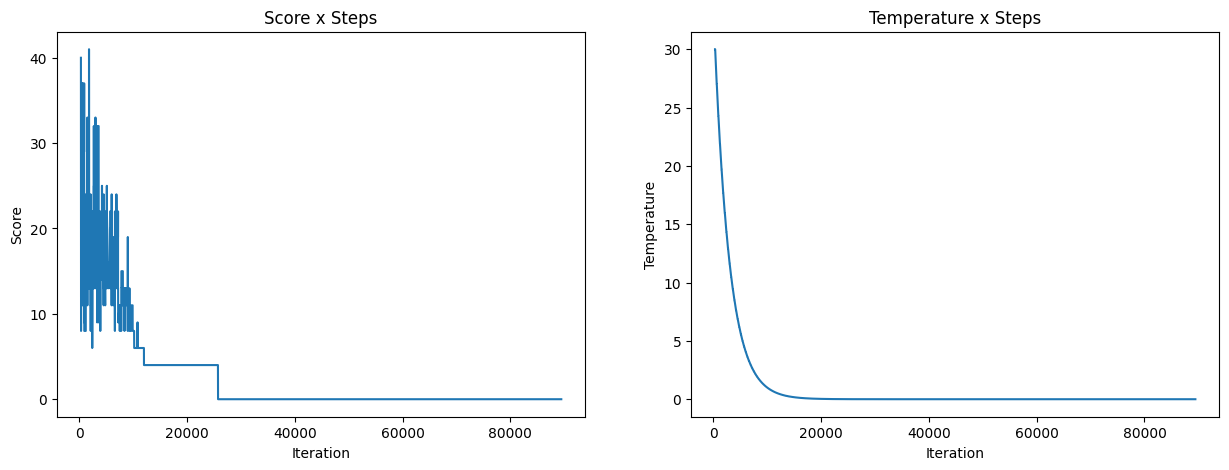

['300', '50', '50', '0.5', '238']


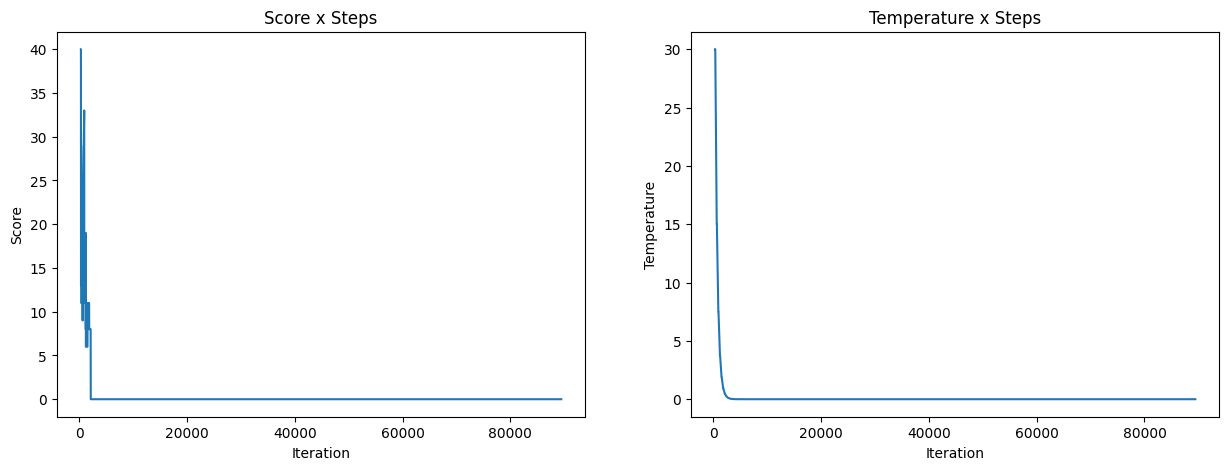

['300', '50', '50', '0.7', '238']


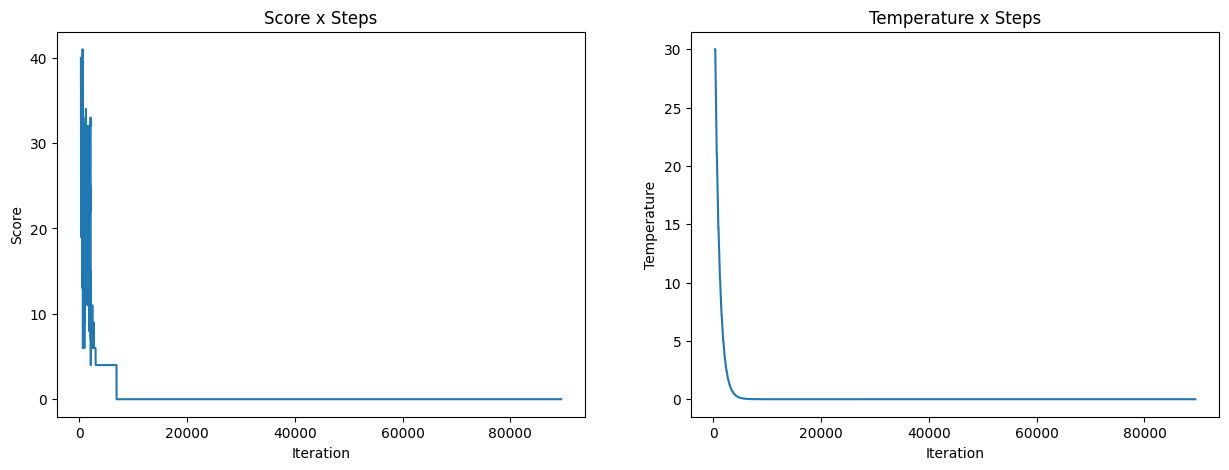

['300', '50', '50', '0.9', '238']


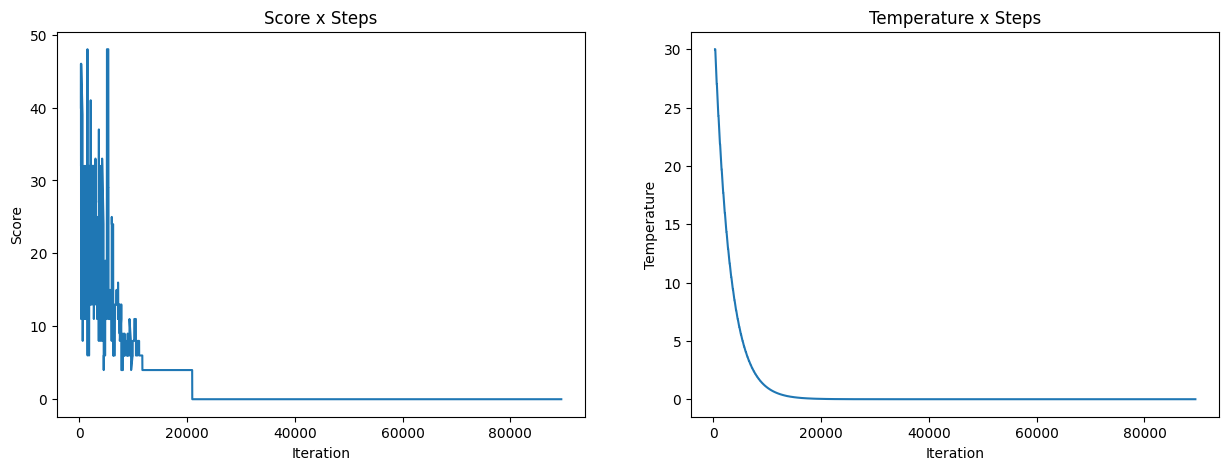

['300', '100', '20', '0.5', '238']


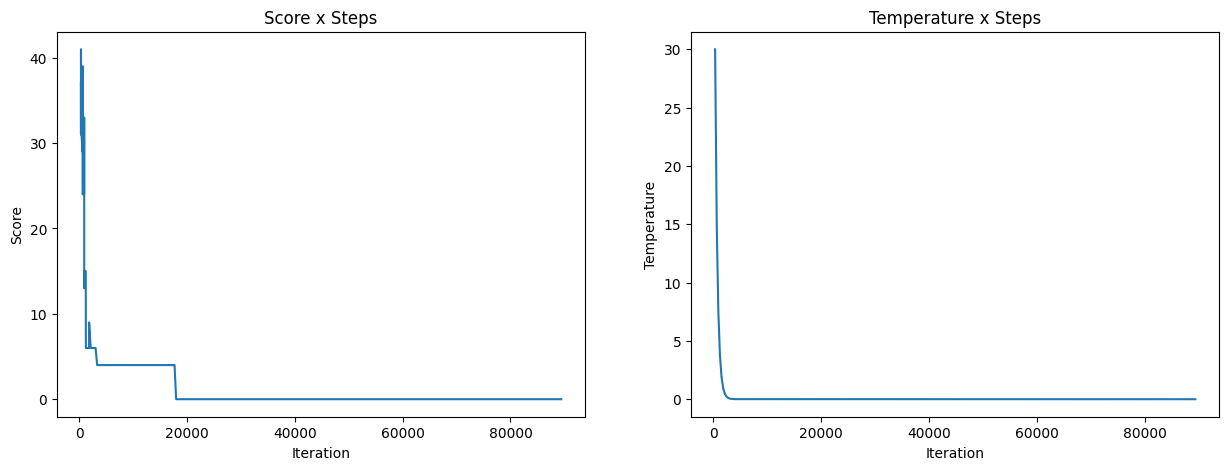

['300', '100', '20', '0.7', '238']


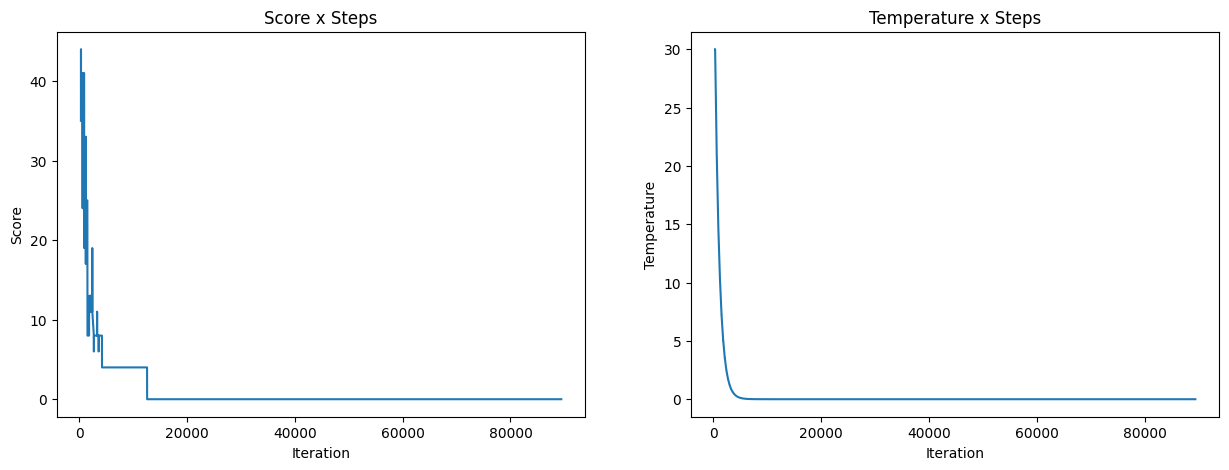

['300', '100', '20', '0.9', '238']


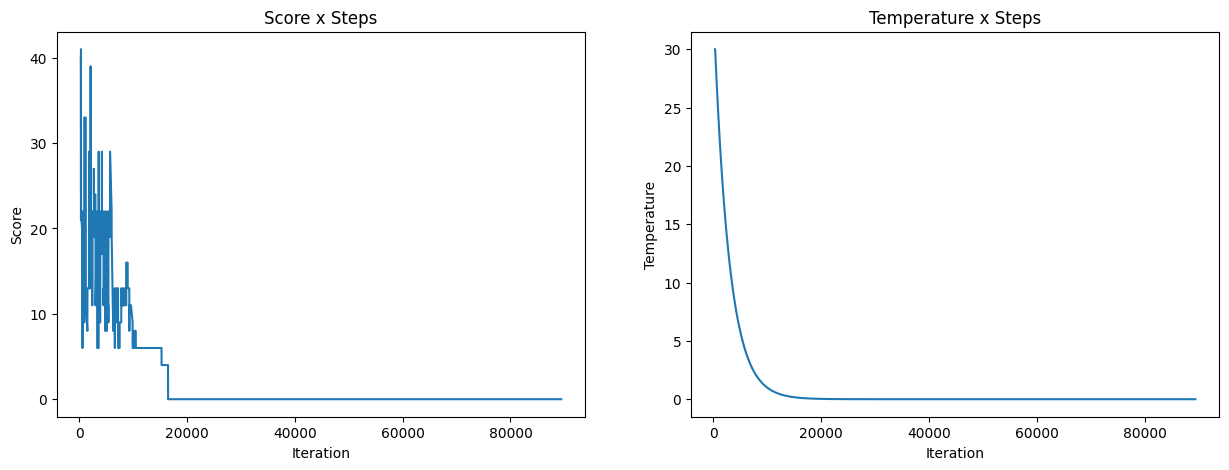

['300', '100', '30', '0.5', '238']


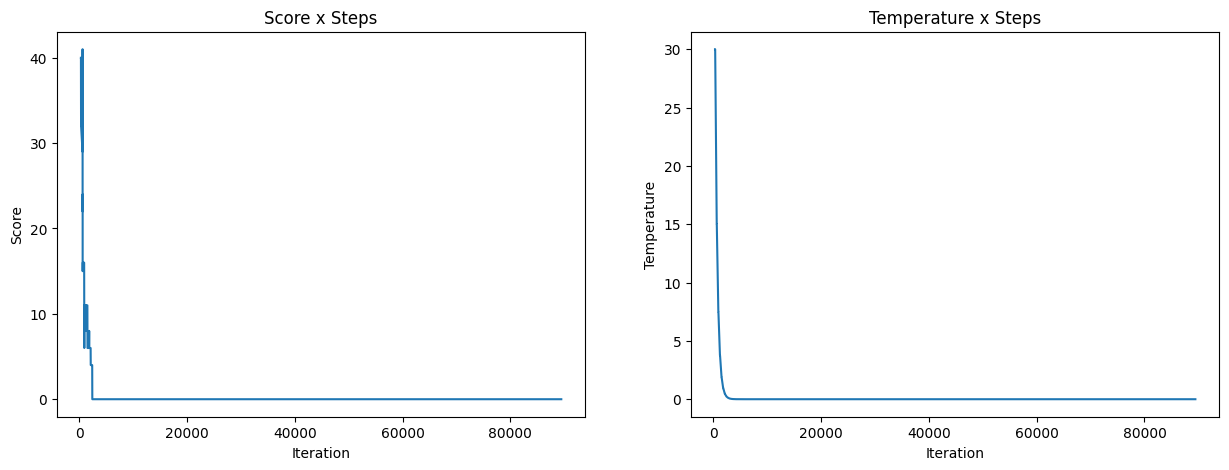

['300', '100', '30', '0.7', '238']


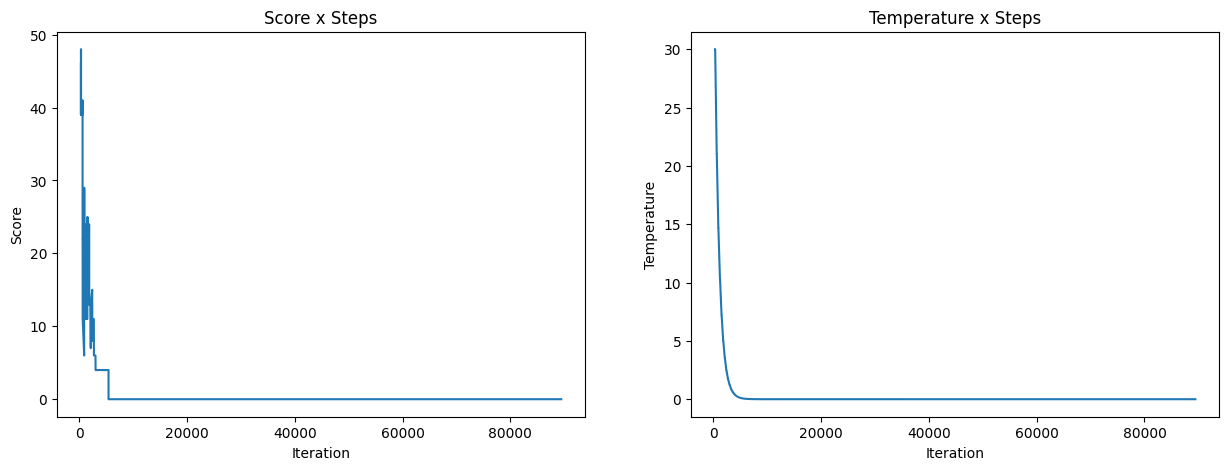

['300', '100', '30', '0.9', '238']


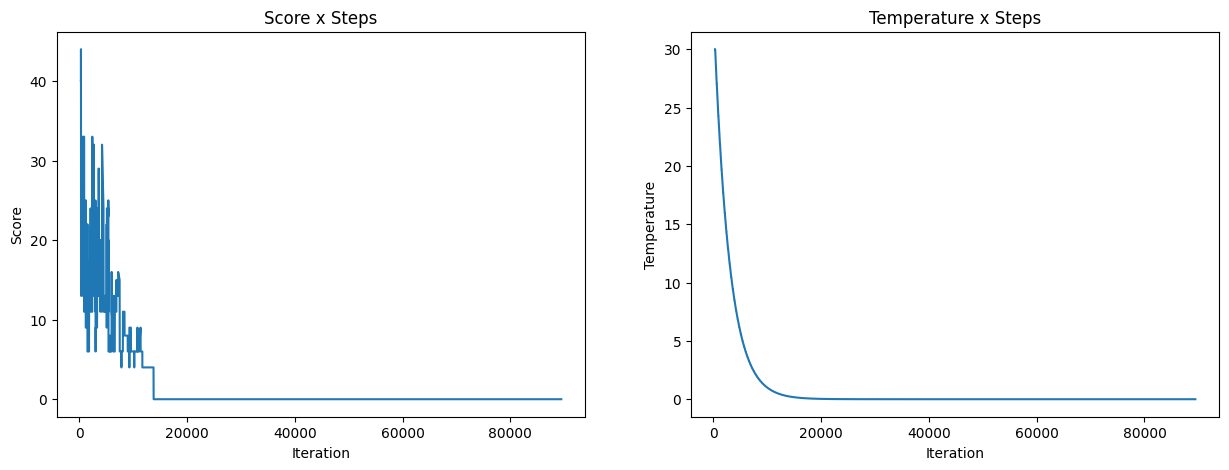

['300', '100', '50', '0.5', '238']


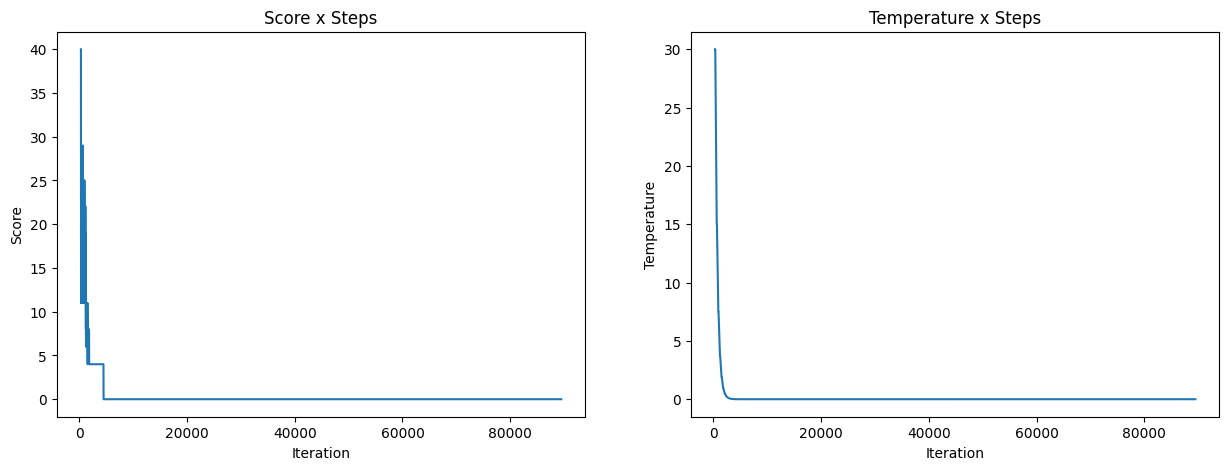

['300', '100', '50', '0.7', '238']


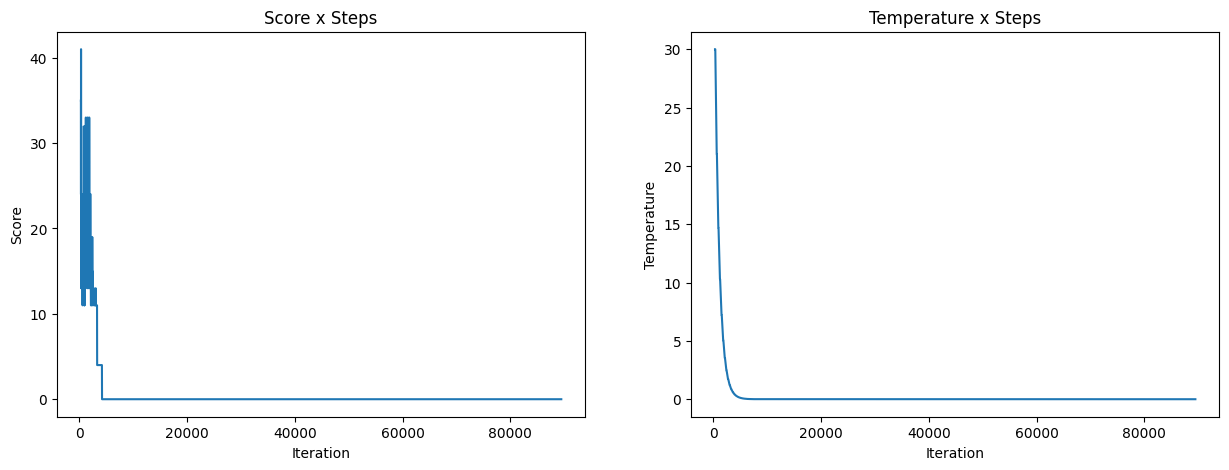

['300', '100', '50', '0.9', '238']


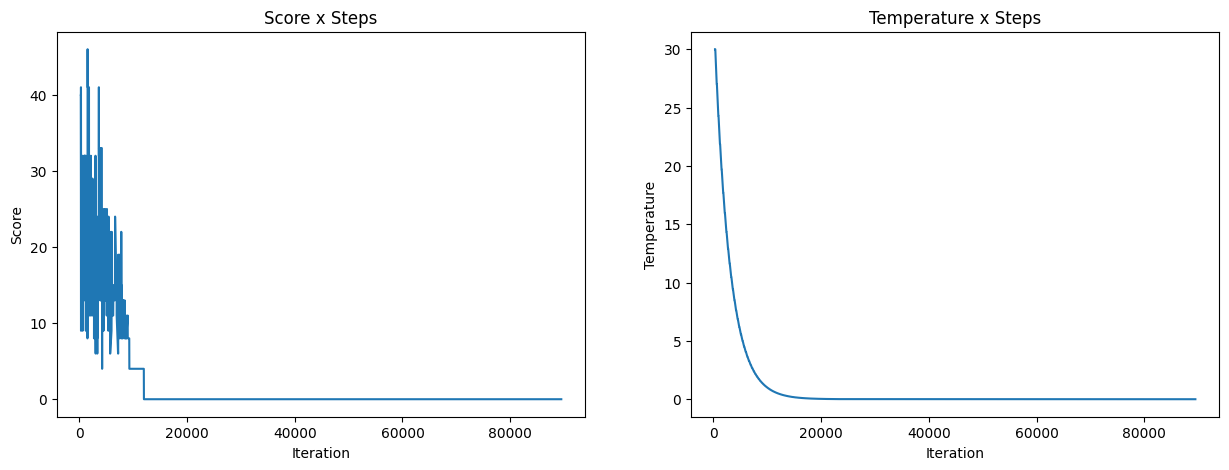

['300', '200', '20', '0.5', '238']


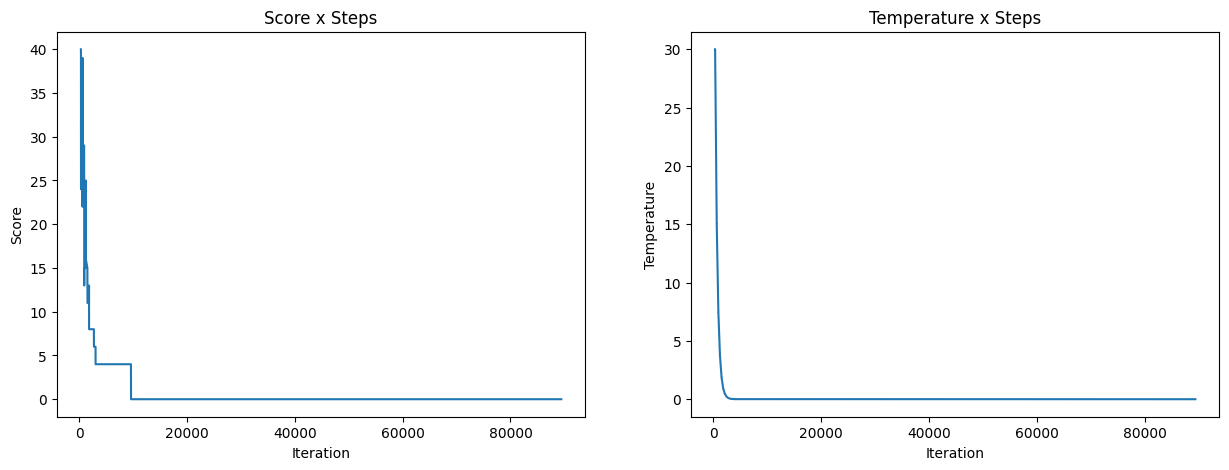

['300', '200', '20', '0.7', '238']


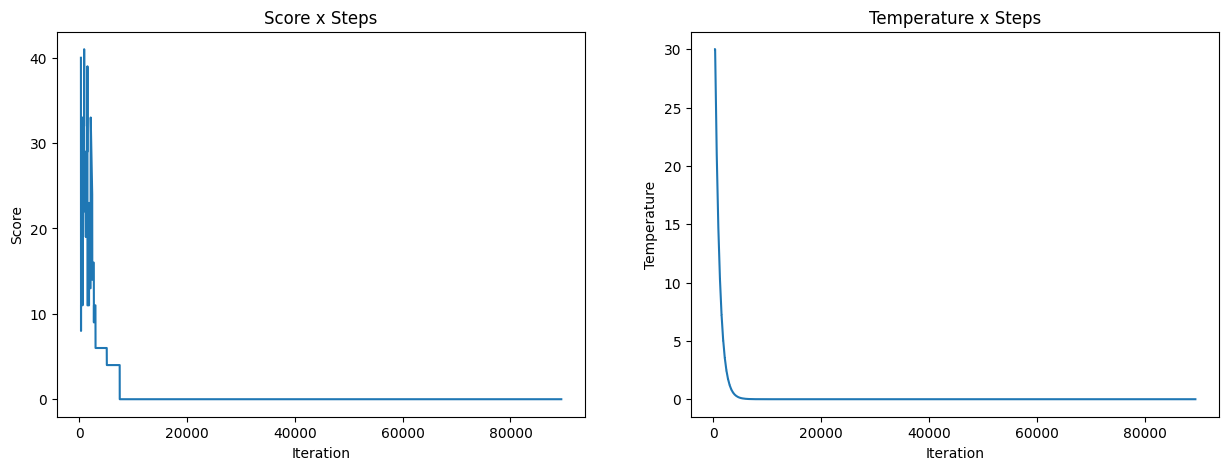

['300', '200', '20', '0.9', '238']


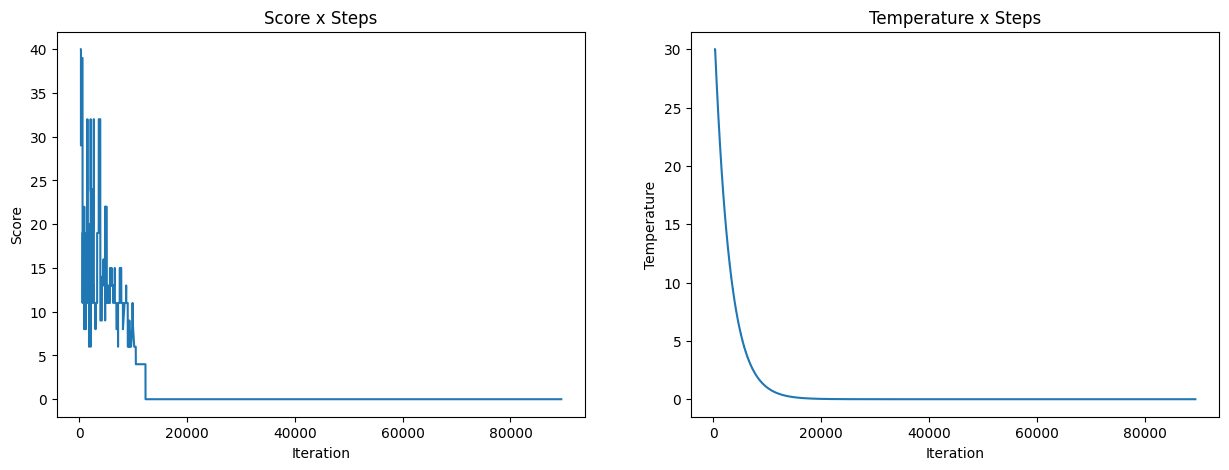

['300', '200', '30', '0.5', '238']


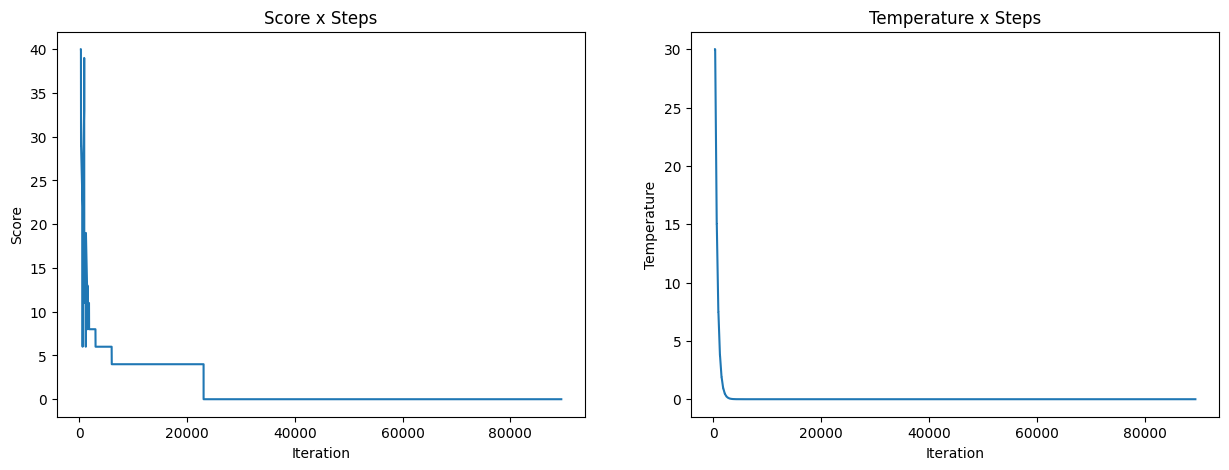

['300', '200', '30', '0.7', '238']


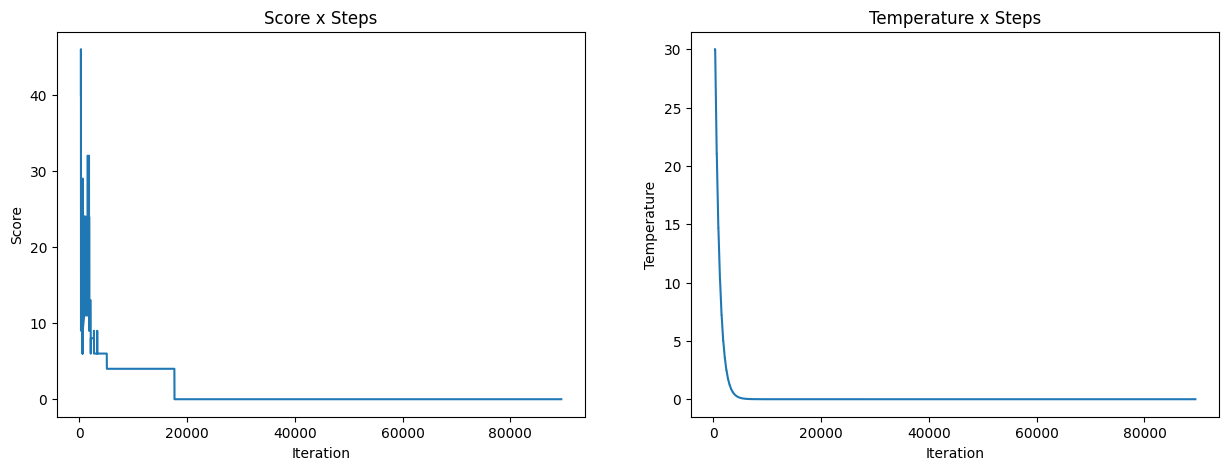

['300', '200', '30', '0.9', '238']


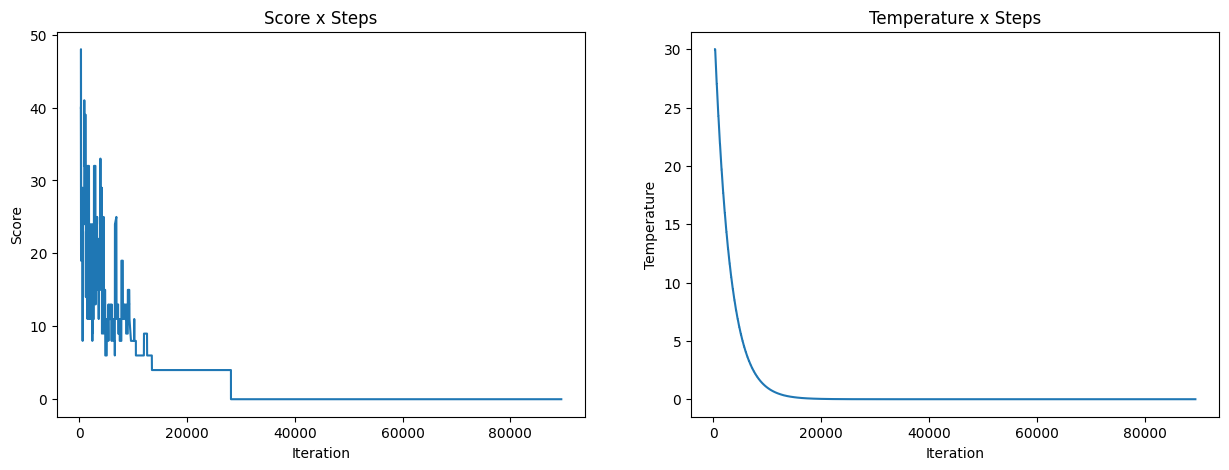

['300', '200', '50', '0.5', '238']


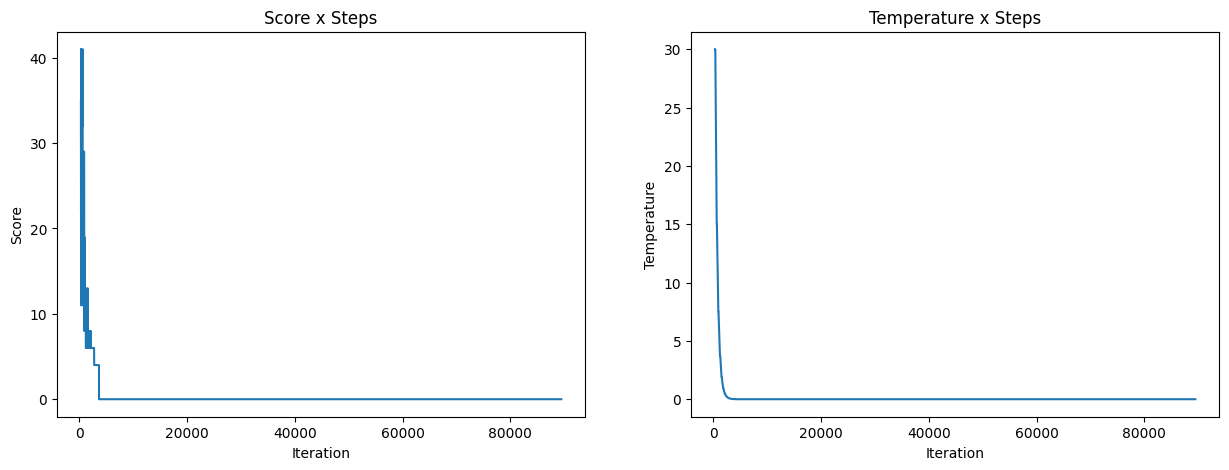

['300', '200', '50', '0.7', '238']


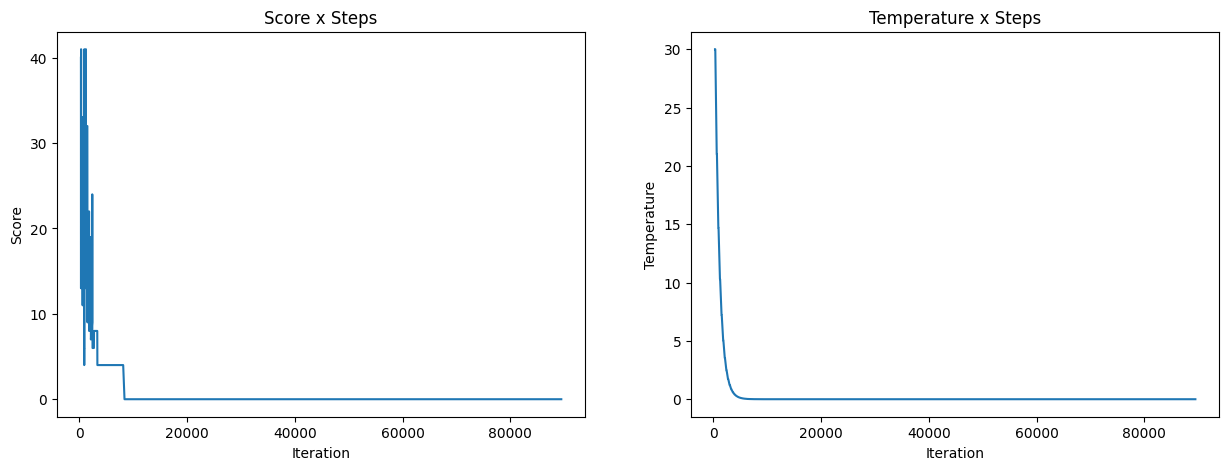

['300', '200', '50', '0.9', '238']


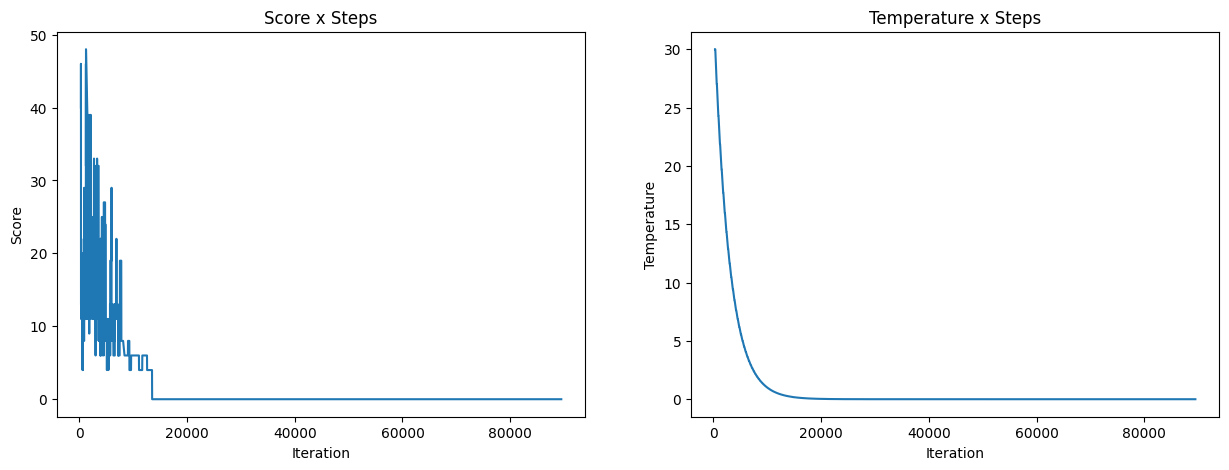

In [23]:
import os

# For all files in a directory
# read all lines from the file
directory = '../out/results/'
file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

for file_path in file_paths:
    table, params = define_table(file_path, True)
    print(params)
    figure, axis = plt.subplots(1, 2)

    figure.set_figwidth(15)
    figure.set_figheight(5)

    # 0 : Score x Steps
    axis[0].plot(table['i']*max(table['i'])+table['j'], table['score'])
    axis[0].set_title('Score x Steps')
    axis[0].set_xlabel('Iteration')
    axis[0].set_ylabel('Score')

    # 1 : Temperature x Steps
    axis[1].plot(table['i']*max(table['i'])+table['j'], table['temperature'])
    axis[1].set_title('Temperature x Steps')
    axis[1].set_xlabel('Iteration')
    axis[1].set_ylabel('Temperature')

    plt.show()
